In [1]:
!pip install pandas plotly

In [2]:
import pandas as pd
import plotly.express as px

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

print(df.columns)

print(df.head())

fig = px.bar(df, x='Nationality', y='Initial Balance Recharge Amount', title='Bar Chart')
fig.show()


Index(['Activation Month', 'Activation Date', 'Dealer Region', 'Dealer City',
       'Distributor Name', 'Dealer Channel', 'Account Manager', 'Dealer Name',
       'Dealer Code', 'Area Manager', 'Key Account Manager', 'Team Leader',
       'Customer SubType', 'Saudi ID', 'Sales Champion', 'Segment Brand',
       'Segment', 'Nationality', 'Customer ID Type', 'Customer ID Number',
       'CAS Latitude', 'CAS Longitude', 'Activation Time', 'Bundle Type',
       'Bundle Description', 'CAS_LOCATION_NAME', 'CAS_LOCATION_ID', 'FPE',
       'Initial Balance Recharge Amount', '1st Recharge Amount',
       '2nd Recharge Amount', '3rd Recharge Amount',
       'Lifetime Recharge Amount',
       'Initial Balance Recharge Amount Without VAT', 'Total Activations',
       'Total First Bundle Revenue', 'Total Unique IDs', '1st Recharge',
       'UID %', 'Dealer Partner Name'],
      dtype='object')
  Activation Month Activation Date Dealer Region Dealer City  \
0       2024-06-01      2024-06-04       

In [3]:
import plotly.express as px


# plotting the histogram
fig = px.histogram(df, x="Nationality")

# showing the plot
fig.show()


In [4]:
import pandas as pd
import numpy as np

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

city_payments = {}
city_segment_counts = {}

for city in cities:
    city_payments[city] = {
        'Count': 0,
        'Total Payment': 0,
        'FRiENDi mobile Count': 0,
        'Virgin Mobile Count': 0
    }

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Count'] += 1
        city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
        if row['Segment Brand'] == 'FRiENDi mobile':
            city_payments[closest_city]['FRiENDi mobile Count'] += 1
        elif row['Segment Brand'] == 'Virgin Mobile':
            city_payments[closest_city]['Virgin Mobile Count'] += 1

for city, data in city_payments.items():
    print(f"City: {city}")
    print(f"  Count of Points: {data['Count']}")
    print(f"  Total Payment: {data['Total Payment']:.2f}")
    print(f"  FRiENDi mobile Count: {data['FRiENDi mobile Count']}")
    print(f"  Virgin Mobile Count: {data['Virgin Mobile Count']}")
    print()


City: Riyadh
  Count of Points: 255
  Total Payment: 18356.11
  FRiENDi mobile Count: 200
  Virgin Mobile Count: 55

City: Jeddah
  Count of Points: 879
  Total Payment: 36299.62
  FRiENDi mobile Count: 646
  Virgin Mobile Count: 233

City: Tabuk
  Count of Points: 190
  Total Payment: 11254.99
  FRiENDi mobile Count: 149
  Virgin Mobile Count: 41



In [5]:
import pandas as pd
import numpy as np

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

city_payments = {}

for city in cities:
    city_payments[city] = {
        'Count': 0,
        'Total Payment': 0,
        'FRiENDi mobile Count': 0,
        'Virgin Mobile Count': 0,
        'Points': []
    }

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Count'] += 1
        city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
        point_info = {
            'Initial Balance': row['Initial Balance Recharge Amount Without VAT'],
            'Segment Brand': row['Segment Brand']
        }
        city_payments[closest_city]['Points'].append(point_info)
        if row['Segment Brand'] == 'FRiENDi mobile':
            city_payments[closest_city]['FRiENDi mobile Count'] += 1
        elif row['Segment Brand'] == 'Virgin Mobile':
            city_payments[closest_city]['Virgin Mobile Count'] += 1

for city, data in city_payments.items():
    print(f"City: {city}")
    print(f"  Count of Points: {data['Count']}")
    print(f"  Total Payment: {data['Total Payment']:.2f}")
    print(f"  FRiENDi mobile Count: {data['FRiENDi mobile Count']}")
    print(f"  Virgin Mobile Count: {data['Virgin Mobile Count']}")
    print("  Points:")
    for point in data['Points']:
        print(f"    - Initial Balance: {point['Initial Balance']:.2f}, Segment Brand: {point['Segment Brand']}")
    print()


City: Riyadh
  Count of Points: 255
  Total Payment: 18356.11
  FRiENDi mobile Count: 200
  Virgin Mobile Count: 55
  Points:
    - Initial Balance: 10.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 99.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 10.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 99.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 99.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 99.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 100.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 85.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 85.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 85.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 110.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 110.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 85.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 85.00, Segment Brand: FRiENDi mobile
    - Initial Balance: 110.00, 

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

city_payments = {}

for city in cities:
    city_payments[city] = {
        'Count': 0,
        'Total Payment': 0,
        'FRiENDi mobile Count': 0,
        'Virgin Mobile Count': 0,
        'Points': [],
        'Highest Payment': {
            'Amount': 0,
            'Latitude': None,
            'Longitude': None,
            'Segment Brand': None
        }
    }

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Count'] += 1
        city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
        point_info = {
            'Initial Balance': row['Initial Balance Recharge Amount Without VAT'],
            'Segment Brand': row['Segment Brand'],
            'Latitude': row['CAS Latitude'],
            'Longitude': row['CAS Longitude']
        }
        city_payments[closest_city]['Points'].append(point_info)
        if row['Segment Brand'] == 'FRiENDi mobile':
            city_payments[closest_city]['FRiENDi mobile Count'] += 1
        elif row['Segment Brand'] == 'Virgin Mobile':
            city_payments[closest_city]['Virgin Mobile Count'] += 1
        if row['Initial Balance Recharge Amount Without VAT'] > city_payments[closest_city]['Highest Payment']['Amount']:
            city_payments[closest_city]['Highest Payment'] = {
                'Amount': row['Initial Balance Recharge Amount Without VAT'],
                'Latitude': row['CAS Latitude'],
                'Longitude': row['CAS Longitude'],
                'Segment Brand': row['Segment Brand']
            }

df['Hover Info'] = df.apply(
    lambda row: f"Initial Balance: {row['Initial Balance Recharge Amount Without VAT']:.2f}<br>Segment Brand: {row['Segment Brand']}",
    axis=1
)

summary_data = []
for city, (city_lat, city_lon) in cities.items():
    data = city_payments[city]
    highest_payment = data['Highest Payment']
    summary_data.append({
        'City': city,
        'Latitude': city_lat,
        'Longitude': city_lon,
        'Count of Points': data['Count'],
        'Total Payment': data['Total Payment'],
        'FRiENDi mobile Count': data['FRiENDi mobile Count'],
        'Virgin Mobile Count': data['Virgin Mobile Count'],
        'Highest Payment Amount': highest_payment['Amount'],
        'Highest Payment Latitude': highest_payment['Latitude'],
        'Highest Payment Longitude': highest_payment['Longitude'],
        'Highest Payment Segment Brand': highest_payment['Segment Brand']
    })
summary_df = pd.DataFrame(summary_data)

fig = px.scatter_mapbox(
    df,
    lat='CAS Latitude',
    lon='CAS Longitude',
    color='Nationality',
    hover_name='Nationality',
    hover_data={'Hover Info': True},
    title='Geographical Distribution of Nationalities',
    zoom=5,
    center={"lat": 24, "lon": 45}
)

for index, row in summary_df.iterrows():
    fig.add_scattermapbox(
        lat=[row['Latitude']],
        lon=[row['Longitude']],
        mode='markers+text',
        marker=dict(size=10, color='red'),
        text=(
            f"City: {row['City']}<br>"
            f"Count of Points: {row['Count of Points']}<br>"
            f"Total Payment: {row['Total Payment']:.2f}<br>"
            f"FRiENDi mobile Count: {row['FRiENDi mobile Count']}<br>"
            f"Virgin Mobile Count: {row['Virgin Mobile Count']}<br>"
            f"Highest Payment: {row['Highest Payment Amount']:.2f}<br>"
            f"Segment: {row['Highest Payment Segment Brand']}<br>"
            f"Highest Payment Location: ({row['Highest Payment Latitude']}, {row['Highest Payment Longitude']})"
        ),
        textposition="top right"
    )

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

fig.show()


In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}


def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

city_payments = {}
for city in cities:
    city_payments[city] = {
        'Count': 0,
        'Total Payment': 0,
        'FRiENDi mobile Count': 0,
        'Virgin Mobile Count': 0,
        'Points': [],
        'Highest Payment': {
            'Amount': 0,
            'Latitude': None,
            'Longitude': None,
            'Segment Brand': None
        },
        'Cluster Labels': set()
    }

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Count'] += 1
        city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
        point_info = {
            'Initial Balance': row['Initial Balance Recharge Amount Without VAT'],
            'Segment Brand': row['Segment Brand'],
            'Latitude': row['CAS Latitude'],
            'Longitude': row['CAS Longitude']
        }
        city_payments[closest_city]['Points'].append(point_info)
        if row['Segment Brand'] == 'FRiENDi mobile':
            city_payments[closest_city]['FRiENDi mobile Count'] += 1
        elif row['Segment Brand'] == 'Virgin Mobile':
            city_payments[closest_city]['Virgin Mobile Count'] += 1
        if row['Initial Balance Recharge Amount Without VAT'] > city_payments[closest_city]['Highest Payment']['Amount']:
            city_payments[closest_city]['Highest Payment'] = {
                'Amount': row['Initial Balance Recharge Amount Without VAT'],
                'Latitude': row['CAS Latitude'],
                'Longitude': row['CAS Longitude'],
                'Segment Brand': row['Segment Brand']
            }

df['Hover Info'] = df.apply(
    lambda row: f"Initial Balance: {row['Initial Balance Recharge Amount Without VAT']:.2f}<br>Segment Brand: {row['Segment Brand']}",
    axis=1
)

coords = df[['CAS Latitude', 'CAS Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.002, min_samples=5)
df['Cluster'] = dbscan.fit_predict(coords_scaled)

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Cluster Labels'].add(row['Cluster'])

cluster_summaries = []
for cluster_label in df['Cluster'].unique():
    if cluster_label == -1:
        continue

    cluster_data = df[df['Cluster'] == cluster_label]
    count = cluster_data.shape[0]
    total_payment = cluster_data['Initial Balance Recharge Amount Without VAT'].sum()
    friendi_count = (cluster_data['Segment Brand'] == 'FRiENDi mobile').sum()
    virgin_count = (cluster_data['Segment Brand'] == 'Virgin Mobile').sum()
    highest_payment_row = cluster_data.loc[cluster_data['Initial Balance Recharge Amount Without VAT'].idxmax()]

    summary_point = {
        'Cluster': cluster_label,
        'Latitude': cluster_data['CAS Latitude'].mean(),
        'Longitude': cluster_data['CAS Longitude'].mean(),
        'Count of Points': count,
        'Total Payment': total_payment,
        'FRiENDi mobile Count': friendi_count,
        'Virgin Mobile Count': virgin_count,
        'Highest Payment Amount': highest_payment_row['Initial Balance Recharge Amount Without VAT'],
        'Highest Payment Latitude': highest_payment_row['CAS Latitude'],
        'Highest Payment Longitude': highest_payment_row['CAS Longitude'],
        'Highest Payment Segment Brand': highest_payment_row['Segment Brand']
    }
    cluster_summaries.append(summary_point)

cluster_summary_df = pd.DataFrame(cluster_summaries)

summary_data = []
for city, (city_lat, city_lon) in cities.items():
    data = city_payments[city]
    highest_payment = data['Highest Payment']
    summary_data.append({
        'City': city,
        'Latitude': city_lat,
        'Longitude': city_lon,
        'Count of Points': data['Count'],
        'Total Payment': data['Total Payment'],
        'FRiENDi mobile Count': data['FRiENDi mobile Count'],
        'Virgin Mobile Count': data['Virgin Mobile Count'],
        'Highest Payment Amount': highest_payment['Amount'],
        'Highest Payment Latitude': highest_payment['Latitude'],
        'Highest Payment Longitude': highest_payment['Longitude'],
        'Highest Payment Segment Brand': highest_payment['Segment Brand'],
        'Number of Clusters': len(data['Cluster Labels'])
    })
summary_df = pd.DataFrame(summary_data)

fig = px.scatter_mapbox(
    df,
    lat='CAS Latitude',
    lon='CAS Longitude',
    color='Cluster',
    hover_name='Nationality',
    hover_data={'Hover Info': True},
    title='Geographical Distribution of Nationalities with DBSCAN Clusters',
    zoom=5,
    center={"lat": 24, "lon": 45}
)

for index, row in summary_df.iterrows():
    fig.add_scattermapbox(
        lat=[row['Latitude']],
        lon=[row['Longitude']],
        mode='markers+text',
        marker=dict(size=10, color='red'),
        text=(
            f"City: {row['City']}<br>"
            f"Count of Points: {row['Count of Points']}<br>"
            f"Total Payment: {row['Total Payment']:.2f}<br>"
            f"FRiENDi mobile Count: {row['FRiENDi mobile Count']}<br>"
            f"Virgin Mobile Count: {row['Virgin Mobile Count']}<br>"
            f"Highest Payment: {row['Highest Payment Amount']:.2f}<br>"
            f"Segment: {row['Highest Payment Segment Brand']}<br>"
            f"Highest Payment Location: ({row['Highest Payment Latitude']}, {row['Highest Payment Longitude']})<br>"
            f"Number of Clusters: {row['Number of Clusters']}"
        ),
        textposition="top right"
    )

for index, row in cluster_summary_df.iterrows():
    fig.add_scattermapbox(
        lat=[row['Latitude']],
        lon=[row['Longitude']],
        mode='markers+text',
        marker=dict(size=10, color='blue'),
        text=(
            f"Cluster: {row['Cluster']}<br>"
            f"Count of Points: {row['Count of Points']}<br>"
            f"Total Payment: {row['Total Payment']:.2f}<br>"
            f"FRiENDi mobile Count: {row['FRiENDi mobile Count']}<br>"
            f"Virgin Mobile Count: {row['Virgin Mobile Count']}<br>"
            f"Highest Payment: {row['Highest Payment Amount']:.2f}<br>"
            f"Segment: {row['Highest Payment Segment Brand']}<br>"
            f"Highest Payment Location: ({row['Highest Payment Latitude']}, {row['Highest Payment Longitude']})"
        ),
        textposition="top right"
    )

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

fig.show()

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

city_payments = {}
for city in cities:
    city_payments[city] = {
        'Count': 0,
        'Total Payment': 0,
        'FRiENDi mobile Count': 0,
        'Virgin Mobile Count': 0,
        'Points': [],
        'Highest Payment': {
            'Amount': 0,
            'Latitude': None,
            'Longitude': None,
            'Segment Brand': None
        },
        'Cluster Labels': set()
    }

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Count'] += 1
        city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
        point_info = {
            'Initial Balance': row['Initial Balance Recharge Amount Without VAT'],
            'Segment Brand': row['Segment Brand'],
            'Latitude': row['CAS Latitude'],
            'Longitude': row['CAS Longitude']
        }
        city_payments[closest_city]['Points'].append(point_info)
        if row['Segment Brand'] == 'FRiENDi mobile':
            city_payments[closest_city]['FRiENDi mobile Count'] += 1
        elif row['Segment Brand'] == 'Virgin Mobile':
            city_payments[closest_city]['Virgin Mobile Count'] += 1
        if row['Initial Balance Recharge Amount Without VAT'] > city_payments[closest_city]['Highest Payment']['Amount']:
            city_payments[closest_city]['Highest Payment'] = {
                'Amount': row['Initial Balance Recharge Amount Without VAT'],
                'Latitude': row['CAS Latitude'],
                'Longitude': row['CAS Longitude'],
                'Segment Brand': row['Segment Brand']
            }

df['Hover Info'] = df.apply(
    lambda row: f"Initial Balance: {row['Initial Balance Recharge Amount Without VAT']:.2f}<br>Segment Brand: {row['Segment Brand']}",
    axis=1
)

coords = df[['CAS Latitude', 'CAS Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.002, min_samples=5)
df['Cluster'] = dbscan.fit_predict(coords_scaled)

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Cluster Labels'].add(row['Cluster'])

cluster_summaries = []
for cluster_label in df['Cluster'].unique():
    if cluster_label == -1:
        continue

    cluster_data = df[df['Cluster'] == cluster_label]
    count = cluster_data.shape[0]
    total_payment = cluster_data['Initial Balance Recharge Amount Without VAT'].sum()
    friendi_count = (cluster_data['Segment Brand'] == 'FRiENDi mobile').sum()
    virgin_count = (cluster_data['Segment Brand'] == 'Virgin Mobile').sum()
    highest_payment_row = cluster_data.loc[cluster_data['Initial Balance Recharge Amount Without VAT'].idxmax()]

    summary_point = {
        'Cluster': cluster_label,
        'Latitude': cluster_data['CAS Latitude'].mean(),
        'Longitude': cluster_data['CAS Longitude'].mean(),
        'Count of Points': count,
        'Total Payment': total_payment,
        'FRiENDi mobile Count': friendi_count,
        'Virgin Mobile Count': virgin_count,
        'Highest Payment Amount': highest_payment_row['Initial Balance Recharge Amount Without VAT'],
        'Highest Payment Latitude': highest_payment_row['CAS Latitude'],
        'Highest Payment Longitude': highest_payment_row['CAS Longitude'],
        'Highest Payment Segment Brand': highest_payment_row['Segment Brand']
    }
    cluster_summaries.append(summary_point)

cluster_summary_df = pd.DataFrame(cluster_summaries)

summary_data = []
for city, (city_lat, city_lon) in cities.items():
    data = city_payments[city]
    highest_payment = data['Highest Payment']
    summary_data.append({
        'City': city,
        'Latitude': city_lat,
        'Longitude': city_lon,
        'Count of Points': data['Count'],
        'Total Payment': data['Total Payment'],
        'FRiENDi mobile Count': data['FRiENDi mobile Count'],
        'Virgin Mobile Count': data['Virgin Mobile Count'],
        'Highest Payment Amount': highest_payment['Amount'],
        'Highest Payment Latitude': highest_payment['Latitude'],
        'Highest Payment Longitude': highest_payment['Longitude'],
        'Highest Payment Segment Brand': highest_payment['Segment Brand'],
        'Number of Clusters': len(data['Cluster Labels'])
    })
summary_df = pd.DataFrame(summary_data)

fig = px.scatter_mapbox(
    df,
    lat='CAS Latitude',
    lon='CAS Longitude',
    color='Cluster',
    hover_name='Nationality',
    hover_data={'Hover Info': True},
    title='Geographical Distribution of Nationalities with DBSCAN Clusters',
    zoom=5,
    center={"lat": 24, "lon": 45}
)

for index, row in summary_df.iterrows():
    fig.add_scattermapbox(
        lat=[row['Latitude']],
        lon=[row['Longitude']],
        mode='markers+text',
        marker=dict(
            size=10,
            color='red'
        ),
        text=(
            f"City: {row['City']}<br>"
            f"Count of Points: {row['Count of Points']}<br>"
            f"Total Payment: {row['Total Payment']:.2f}<br>"
            f"FRiENDi mobile Count: {row['FRiENDi mobile Count']}<br>"
            f"Virgin Mobile Count: {row['Virgin Mobile Count']}<br>"
            f"Highest Payment: {row['Highest Payment Amount']:.2f}<br>"
            f"Segment: {row['Highest Payment Segment Brand']}<br>"
            f"Highest Payment Location: ({row['Highest Payment Latitude']}, {row['Highest Payment Longitude']})<br>"
            f"Number of Clusters: {row['Number of Clusters']}"
        ),
        textposition="top right"
    )


fig.add_scattermapbox(
    lat=cluster_summary_df['Latitude'],
    lon=cluster_summary_df['Longitude'],
    mode='markers+text',
    marker=dict(
        size=10,
        color=cluster_summary_df['Total Payment'],
        colorbar=dict(title='Total Payment'),
        colorscale='Viridis',
        showscale=True,
        opacity=0.7
    ),
    text=(
        cluster_summary_df.apply(
            lambda row: (
                f"Cluster: {row['Cluster']}<br>"
                f"Count of Points: {row['Count of Points']}<br>"
                f"Total Payment: {row['Total Payment']:.2f}<br>"
                f"FRiENDi mobile Count: {row['FRiENDi mobile Count']}<br>"
                f"Virgin Mobile Count: {row['Virgin Mobile Count']}<br>"
                f"Highest Payment: {row['Highest Payment Amount']:.2f}<br>"
                f"Segment: {row['Highest Payment Segment Brand']}<br>"
                f"Highest Payment Location: ({row['Highest Payment Latitude']}, {row['Highest Payment Longitude']})"
            ),
            axis=1
        ).tolist()
    ),
    textposition="top right"
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

fig.show()


In [9]:
!pip install pydeck

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 17.1 MB/s eta 0:00:00


In [10]:

import pydeck as pdk

DATA_URL = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/geojson/vancouver-blocks.json"
LAND_COVER = [[[-123.0, 49.196], [-123.0, 49.324], [-123.306, 49.324], [-123.306, 49.196]]]

INITIAL_VIEW_STATE = pdk.ViewState(latitude=49.254, longitude=-123.13, zoom=11, max_zoom=16, pitch=45, bearing=0)

polygon = pdk.Layer(
    "PolygonLayer",
    LAND_COVER,
    stroked=False,
    # processes the data as a flat longitude-latitude pair
    get_polygon="-",
    get_fill_color=[0, 0, 0, 20],
)

geojson = pdk.Layer(
    "GeoJsonLayer",
    DATA_URL,
    opacity=0.8,
    stroked=False,
    filled=True,
    extruded=True,
    wireframe=True,
    get_elevation="properties.valuePerSqm / 20",
    get_fill_color="[255, 255, properties.growth * 255]",
    get_line_color=[255, 255, 255],
)

r = pdk.Deck(layers=[polygon, geojson], initial_view_state=INITIAL_VIEW_STATE)

r.to_html("geojson_layer.html")

<IPython.core.display.Javascript object>

In [11]:
import math
import pandas as pd
import numpy as np
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

city_payments = {}
for city in cities:
    city_payments[city] = {
        'Count': 0,
        'Total Payment': 0,
        'FRiENDi mobile Count': 0,
        'Virgin Mobile Count': 0,
        'Points': [],
        'Highest Payment': {
            'Amount': 0,
            'Latitude': None,
            'Longitude': None,
            'Segment Brand': None
        },
        'Cluster Labels': set()
    }

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Count'] += 1
        city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
        point_info = {
            'Initial Balance': row['Initial Balance Recharge Amount Without VAT'],
            'Segment Brand': row['Segment Brand'],
            'Latitude': row['CAS Latitude'],
            'Longitude': row['CAS Longitude']
        }
        city_payments[closest_city]['Points'].append(point_info)
        if row['Segment Brand'] == 'FRiENDi mobile':
            city_payments[closest_city]['FRiENDi mobile Count'] += 1
        elif row['Segment Brand'] == 'Virgin Mobile':
            city_payments[closest_city]['Virgin Mobile Count'] += 1
        if row['Initial Balance Recharge Amount Without VAT'] > city_payments[closest_city]['Highest Payment']['Amount']:
            city_payments[closest_city]['Highest Payment'] = {
                'Amount': row['Initial Balance Recharge Amount Without VAT'],
                'Latitude': row['CAS Latitude'],
                'Longitude': row['CAS Longitude'],
                'Segment Brand': row['Segment Brand']
            }

coords = df[['CAS Latitude', 'CAS Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.002, min_samples=5)
df['Cluster'] = dbscan.fit_predict(coords_scaled)

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Cluster Labels'].add(row['Cluster'])


cluster_summaries = []
for cluster_label in df['Cluster'].unique():
    if cluster_label == -1:
        continue

    cluster_data = df[df['Cluster'] == cluster_label]
    count = cluster_data.shape[0]
    total_payment = cluster_data['Initial Balance Recharge Amount Without VAT'].sum()
    friendi_count = (cluster_data['Segment Brand'] == 'FRiENDi mobile').sum()
    virgin_count = (cluster_data['Segment Brand'] == 'Virgin Mobile').sum()
    highest_payment_row = cluster_data.loc[cluster_data['Initial Balance Recharge Amount Without VAT'].idxmax()]

    summary_point = {
        'Cluster': cluster_label,
        'Latitude': cluster_data['CAS Latitude'].mean(),
        'Longitude': cluster_data['CAS Longitude'].mean(),
        'Count of Points': count,
        'Total Payment': total_payment,
        'FRiENDi mobile Count': friendi_count,
        'Virgin Mobile Count': virgin_count,
        'Highest Payment Amount': highest_payment_row['Initial Balance Recharge Amount Without VAT'],
        'Highest Payment Latitude': highest_payment_row['CAS Latitude'],
        'Highest Payment Longitude': highest_payment_row['CAS Longitude'],
        'Highest Payment Segment Brand': highest_payment_row['Segment Brand']
    }
    cluster_summaries.append(summary_point)

cluster_summary_df = pd.DataFrame(cluster_summaries)

scaler = MinMaxScaler(feature_range=(0, 10000))
cluster_summary_df['Elevation'] = scaler.fit_transform(cluster_summary_df[['Total Payment']])

polygon_layer = pdk.Layer(
    "ColumnLayer",
    data=cluster_summary_df,
    get_position=["Longitude", "Latitude"],
    get_elevation="Elevation",
    elevation_scale=10,
    radius=1500,
    get_fill_color=[255, 0, 0, 180],
    pickable=True,
    auto_highlight=True,
)

view_state = pdk.ViewState(
    latitude=24.7136,
    longitude=46.6753,
    zoom=5,
    pitch=45
)

r = pdk.Deck(
    layers=[polygon_layer],
    initial_view_state=view_state,
    tooltip={
        "text": "Cluster: {Cluster}\nTotal Payment: {Total Payment}\nCount of Points: {Count of Points}\nHighest Payment: {Highest Payment Amount}"
    }
)

r.to_html("cluster_visualization.html")

<IPython.core.display.Javascript object>

In [12]:
import pandas as pd
excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

dealer_payments = df.groupby('Dealer Code')['Initial Balance Recharge Amount'].sum().reset_index()

print(dealer_payments)


   Dealer Code  Initial Balance Recharge Amount
0    DIR-07970                         724.4885
1    DIR-08070                        1771.0000
2    DIR-08196                        4437.8730
3    DIR-08197                         126.5000
4    DIR-09162                        1253.4885
5    DIR-09163                        2840.4425
6    DIR-09165                         826.8500
7    DIR-09501                        6291.6615
8    DIR-09503                         534.7500
9    DIR-10946                        5858.1000
10   DIR-11173                        3790.8255
11   DIR-11691                        1598.4885
12   DIR-11696                        1861.2520
13   DIR-11698                         983.2500
14   DIR-11701                        2308.6135
15   DIR-12381                         716.9790
16   DIR-12391                        3328.6175
17   DIR-12420                         985.5615
18   DIR-12455                         948.7500
19   DIR-12456                        26

In [13]:
!pip install geopy

In [14]:
import pandas as pd

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

dealer_payments = df.groupby(['Dealer Code', 'CAS Latitude', 'CAS Longitude'])['Initial Balance Recharge Amount'].sum().reset_index()

print(dealer_payments)

     Dealer Code  CAS Latitude  CAS Longitude  Initial Balance Recharge Amount
0      DIR-07970     21.625589      39.161883                          11.5000
1      DIR-07970     21.625642      39.161925                          11.5000
2      DIR-07970     21.625844      39.162271                          34.4885
3      DIR-07970     21.625859      39.162127                          34.5000
4      DIR-07970     21.625862      39.162601                          23.0000
...          ...           ...            ...                              ...
1209   DIR-17372     24.688462      46.643342                          97.7500
1210   DIR-17372     24.688465      46.643133                         115.0000
1211   DIR-17372     24.688478      46.643208                          34.4885
1212   DIR-17372     24.688478      46.643308                          63.2500
1213   DIR-17372     24.688495      46.643223                         113.8500

[1214 rows x 4 columns]


In [15]:
import pandas as pd
import numpy as np
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

city_payments = {}
for city in cities:
    city_payments[city] = {
        'Count': 0,
        'Total Payment': 0,
        'FRiENDi mobile Count': 0,
        'Virgin Mobile Count': 0,
        'Points': [],
        'Highest Payment': {
            'Amount': 0,
            'Latitude': None,
            'Longitude': None,
            'Segment Brand': None
        },
        'Cluster Labels': set()
    }

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Count'] += 1
        city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
        point_info = {
            'Initial Balance': row['Initial Balance Recharge Amount Without VAT'],
            'Segment Brand': row['Segment Brand'],
            'Latitude': row['CAS Latitude'],
            'Longitude': row['CAS Longitude']
        }
        city_payments[closest_city]['Points'].append(point_info)
        if row['Segment Brand'] == 'FRiENDi mobile':
            city_payments[closest_city]['FRiENDi mobile Count'] += 1
        elif row['Segment Brand'] == 'Virgin Mobile':
            city_payments[closest_city]['Virgin Mobile Count'] += 1
        if row['Initial Balance Recharge Amount Without VAT'] > city_payments[closest_city]['Highest Payment']['Amount']:
            city_payments[closest_city]['Highest Payment'] = {
                'Amount': row['Initial Balance Recharge Amount Without VAT'],
                'Latitude': row['CAS Latitude'],
                'Longitude': row['CAS Longitude'],
                'Segment Brand': row['Segment Brand']
            }

coords = df[['CAS Latitude', 'CAS Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.002, min_samples=5)
df['Cluster'] = dbscan.fit_predict(coords_scaled)

cluster_dealer_payments = {}

for cluster_label in df['Cluster'].unique():
    if cluster_label == -1:
        continue

    cluster_data = df[df['Cluster'] == cluster_label]
    dealer_highest_payment = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().idxmax()
    highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

    cluster_dealer_payments[cluster_label] = {
        'Cluster': cluster_label,
        'Dealer Code': dealer_highest_payment,
        'Highest Payment Amount': highest_payment_amount,
        'Latitude': cluster_data['CAS Latitude'].mean(),
        'Longitude': cluster_data['CAS Longitude'].mean(),
    }

cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
cluster_dealer_df.columns = ['index', 'Cluster', 'Dealer Code', 'Highest Payment Amount', 'Latitude', 'Longitude']

min_payment = cluster_dealer_df['Highest Payment Amount'].min()
max_payment = cluster_dealer_df['Highest Payment Amount'].max()
range_payment = max_payment - min_payment

cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

view_state = pdk.ViewState(
    latitude=24.7136,
    longitude=46.6753,
    zoom=5,
    pitch=45
)

column_layer = pdk.Layer(
    "ColumnLayer",
    data=cluster_dealer_df,
    get_position=["Longitude", "Latitude"],
    get_elevation="Elevation",
    elevation_scale=50,
    radius=500,
    get_fill_color=[255, 0, 0, 180],
    pickable=True,
    auto_highlight=True,
)

tooltip = {
    'html': '<b>Cluster:</b> {Cluster}<br><b>Dealer Code:</b> {Dealer Code}<br><b>Highest Payment:</b> {Highest Payment Amount}',
    'style': {
        'backgroundColor': 'steelblue',
        'color': 'white'
    }
}

r = pdk.Deck(
    layers=[column_layer],
    initial_view_state=view_state,
    tooltip=tooltip,
)

output_path = 'cluster_dealer_column_chart.html'
r.to_html(output_path)

print(f"Map saved to: {output_path}")


<IPython.core.display.Javascript object>

Map saved to: cluster_dealer_column_chart.html


In [16]:
import pandas as pd
import numpy as np
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

city_payments = {}
for city in cities:
    city_payments[city] = {
        'Count': 0,
        'Total Payment': 0,
        'FRiENDi mobile Count': 0,
        'Virgin Mobile Count': 0,
        'Points': [],
        'Highest Payment': {
            'Amount': 0,
            'Latitude': None,
            'Longitude': None,
            'Segment Brand': None
        },
        'Cluster Labels': set()
    }

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Count'] += 1
        city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
        point_info = {
            'Initial Balance': row['Initial Balance Recharge Amount Without VAT'],
            'Segment Brand': row['Segment Brand'],
            'Latitude': row['CAS Latitude'],
            'Longitude': row['CAS Longitude']
        }
        city_payments[closest_city]['Points'].append(point_info)
        if row['Segment Brand'] == 'FRiENDi mobile':
            city_payments[closest_city]['FRiENDi mobile Count'] += 1
        elif row['Segment Brand'] == 'Virgin Mobile':
            city_payments[closest_city]['Virgin Mobile Count'] += 1
        if row['Initial Balance Recharge Amount Without VAT'] > city_payments[closest_city]['Highest Payment']['Amount']:
            city_payments[closest_city]['Highest Payment'] = {
                'Amount': row['Initial Balance Recharge Amount Without VAT'],
                'Latitude': row['CAS Latitude'],
                'Longitude': row['CAS Longitude'],
                'Segment Brand': row['Segment Brand']
            }

coords = df[['CAS Latitude', 'CAS Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.002, min_samples=5)
df['Cluster'] = dbscan.fit_predict(coords_scaled)

cluster_dealer_payments = {}

for cluster_label in df['Cluster'].unique():
    if cluster_label == -1:
        continue

    cluster_data = df[df['Cluster'] == cluster_label]
    dealers_data = []

    for dealer, dealer_data in cluster_data.groupby('Dealer Code'):
        total_payment = dealer_data['Initial Balance Recharge Amount Without VAT'].sum()
        dealers_data.append({
            'Dealer Code': dealer,
            'Total Payment': total_payment,
            'Latitude': dealer_data['CAS Latitude'].mean(),
            'Longitude': dealer_data['CAS Longitude'].mean()
        })

    sorted_dealers = sorted(dealers_data, key=lambda x: x['Total Payment'], reverse=True)

    cluster_dealer_payments[cluster_label] = {
        'Cluster': cluster_label,
        'Dealers': sorted_dealers,
        'Latitude': cluster_data['CAS Latitude'].mean(),
        'Longitude': cluster_data['CAS Longitude'].mean()
    }

min_payment = min([dealer['Total Payment'] for data in cluster_dealer_payments.values() for dealer in data['Dealers']])
max_payment = max([dealer['Total Payment'] for data in cluster_dealer_payments.values() for dealer in data['Dealers']])
range_payment = max_payment - min_payment

for data in cluster_dealer_payments.values():
    for dealer in data['Dealers']:
        dealer['Elevation'] = (dealer['Total Payment'] - min_payment) / range_payment * 100

pydeck_layers = []
unique_clusters = df['Cluster'].unique()

cluster_colors = {}
for i, cluster_label in enumerate(unique_clusters):
    cluster_colors[cluster_label] = [255 - i*50, 0, 0, 180]

for cluster_label, data in cluster_dealer_payments.items():
    dealers_data = data['Dealers']

    column_layer = pdk.Layer(
        "ColumnLayer",
        data=dealers_data,
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=150,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )

    pydeck_layers.append(column_layer)

view_state = pdk.ViewState(
    latitude=24.7136,
    longitude=46.6753,
    zoom=5,
    pitch=45
)

r = pdk.Deck(
    layers=pydeck_layers,
    initial_view_state=view_state,
    tooltip={
        'html': '<b>Cluster:</b> {Cluster}<br><b>Dealer Code:</b> {Dealer Code}<br><b>Highest Payment:</b> {Total Payment}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }
)

output_path = 'cluster_dealer_column_chart.html'
r.to_html(output_path)

print(f"Map saved to: {output_path}")


<IPython.core.display.Javascript object>

Map saved to: cluster_dealer_column_chart.html


In [17]:
import pandas as pd
import numpy as np

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

dealer_highest_payment_location = {}

for dealer, dealer_data in df.groupby('Dealer Code'):
    max_payment = dealer_data['Initial Balance Recharge Amount Without VAT'].max()
    max_payment_row = dealer_data[dealer_data['Initial Balance Recharge Amount Without VAT'] == max_payment].iloc[0]

    dealer_highest_payment_location[dealer] = {
        'Dealer Code': dealer,
        'Total Payment': max_payment,
        'Highest Payment Location': {
            'Latitude': max_payment_row['CAS Latitude'],
            'Longitude': max_payment_row['CAS Longitude']
        }
    }

for dealer, data in dealer_highest_payment_location.items():
    print(f"Dealer Code: {data['Dealer Code']}")
    print(f"Total Payment: {data['Total Payment']}")
    print(f"Highest Payment Location: Latitude - {data['Highest Payment Location']['Latitude']}, Longitude - {data['Highest Payment Location']['Longitude']}")
    print("---------------------------------------------")


Dealer Code: DIR-07970
Total Payment: 100.0
Highest Payment Location: Latitude - 21.626185133333333, Longitude - 39.16305961666667
---------------------------------------------
Dealer Code: DIR-08070
Total Payment: 100.0
Highest Payment Location: Latitude - 21.569669999999995, Longitude - 39.17485666666666
---------------------------------------------
Dealer Code: DIR-08196
Total Payment: 380.02
Highest Payment Location: Latitude - 21.450026861038005, Longitude - 39.2894993197196
---------------------------------------------
Dealer Code: DIR-08197
Total Payment: 70.0
Highest Payment Location: Latitude - 21.581902300000003, Longitude - 39.169168516666666
---------------------------------------------
Dealer Code: DIR-09162
Total Payment: 100.0
Highest Payment Location: Latitude - 21.6332603, Longitude - 39.162135516666666
---------------------------------------------
Dealer Code: DIR-09163
Total Payment: 110.0
Highest Payment Location: Latitude - 21.581719666666665, Longitude - 39.169245

In [18]:
import pandas as pd
import numpy as np
import pydeck as pdk

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

dealer_highest_payment_location = {}

for dealer, dealer_data in df.groupby('Dealer Code'):
    max_payment = dealer_data['Initial Balance Recharge Amount Without VAT'].max()
    max_payment_row = dealer_data[dealer_data['Initial Balance Recharge Amount Without VAT'] == max_payment].iloc[0]

    dealer_highest_payment_location[dealer] = {
        'Dealer Code': dealer,
        'Total Payment': max_payment,
        'Latitude': max_payment_row['CAS Latitude'],
        'Longitude': max_payment_row['CAS Longitude']
    }

pydeck_layers = []

for dealer, data in dealer_highest_payment_location.items():
    column_layer = pdk.Layer(
        "ColumnLayer",
        data=[{
            "Latitude": data['Latitude'],
            "Longitude": data['Longitude'],
            "Elevation": 100,
            "color": [255, 0, 0, 180],
            "Dealer Code": data['Dealer Code'],
            "Total Payment": data['Total Payment']
        }],
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=150,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )

    pydeck_layers.append(column_layer)

view_state = pdk.ViewState(
    latitude=df['CAS Latitude'].mean(),
    longitude=df['CAS Longitude'].mean(),
    zoom=5,
    pitch=45
)

r = pdk.Deck(
    layers=pydeck_layers,
    initial_view_state=view_state,
    tooltip={
        'html': '<b>Dealer Code:</b> {Dealer Code}<br><b>Total Payment:</b> {Total Payment}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }
)

output_path = 'dealer_highest_payment_locations.html'
r.to_html(output_path)

print(f"Map saved to: {output_path}")


<IPython.core.display.Javascript object>

Map saved to: dealer_highest_payment_locations.html


In [19]:
import pandas as pd
import pydeck as pdk

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

dealer_code = input("Enter the Dealer Code: ")

dealer_df = df[df['Dealer Code'] == dealer_code]

if dealer_df.empty:
    print("No data found for the specified dealer code.")
    exit()

location_payments = dealer_df.groupby(['CAS Latitude', 'CAS Longitude']).agg({
    'Initial Balance Recharge Amount Without VAT': 'sum'
}).reset_index()

pydeck_layers = []
for _, row in location_payments.iterrows():
    column_layer = pdk.Layer(
        "ColumnLayer",
        data=[{
            "Latitude": row['CAS Latitude'],
            "Longitude": row['CAS Longitude'],
            "Elevation": row['Initial Balance Recharge Amount Without VAT'],
            "Total Payment": row['Initial Balance Recharge Amount Without VAT']
        }],
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=10,
        radius=100,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )
    pydeck_layers.append(column_layer)


view_state = pdk.ViewState(
    latitude=dealer_df['CAS Latitude'].mean(),
    longitude=dealer_df['CAS Longitude'].mean(),
    zoom=10,
    pitch=45
)

r = pdk.Deck(
    layers=pydeck_layers,
    initial_view_state=view_state,
    tooltip={
        'html': '<b>Location:</b> ({Latitude}, {Longitude})<br><b>Total Payment:</b> {Total Payment}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }
)

output_path = f'dealer_{dealer_code}_payments.html'
r.to_html(output_path)

print(f"Map saved to: {output_path}")


Enter the Dealer Code: DIR-09501


<IPython.core.display.Javascript object>

Map saved to: dealer_DIR-09501_payments.html


In [20]:
import pandas as pd
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

coords = df[['CAS Latitude', 'CAS Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)
dbscan = DBSCAN(eps=0.002, min_samples=5)
df['Cluster'] = dbscan.fit_predict(coords_scaled)

customer_id_type = input("Enter the Customer ID Type: ")

customer_df = df[df['Customer ID Type'] == customer_id_type]

if customer_df.empty:
    print("No data found for the specified Customer ID Type.")
    exit()

if 'Cluster' not in customer_df.columns:
    print("Cluster column is missing from the DataFrame.")
    exit()

cluster_payments = customer_df.groupby('Cluster').agg({
    'Initial Balance Recharge Amount Without VAT': 'sum',
    'CAS Latitude': 'mean',
    'CAS Longitude': 'mean'
}).reset_index()

if cluster_payments.empty:
    print("No clusters found for the specified Customer ID Type.")
    exit()

min_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].min()
max_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].max()
range_payment = max_payment - min_payment

cluster_payments['Elevation'] = cluster_payments['Initial Balance Recharge Amount Without VAT'].apply(
    lambda x: (x - min_payment) / range_payment * 100
)

cluster_payments['Location'] = cluster_payments.apply(
    lambda row: f"Latitude: {row['CAS Latitude']}, Longitude: {row['CAS Longitude']}",
    axis=1
)

pydeck_layers = []

for _, row in cluster_payments.iterrows():
    column_layer = pdk.Layer(
        "ColumnLayer",
        data=[{
            "Latitude": row['CAS Latitude'],
            "Longitude": row['CAS Longitude'],
            "Elevation": row['Elevation'],
            "Total Payment": row['Initial Balance Recharge Amount Without VAT'],
            "Location": row['Location']
        }],
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=1000,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )
    pydeck_layers.append(column_layer)

view_state = pdk.ViewState(
    latitude=customer_df['CAS Latitude'].mean(),
    longitude=customer_df['CAS Longitude'].mean(),
    zoom=10,
    pitch=45
)

r = pdk.Deck(
    layers=pydeck_layers,
    initial_view_state=view_state,
    tooltip={
        'html': '<b>Location:</b> {Location}<br><b>Total Payment:</b> {Total Payment}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }
)

output_path = f'customer_{customer_id_type}_payments.html'
r.to_html(output_path)

print(f"Map saved to: {output_path}")


Enter the Customer ID Type: Visitor Visa


<IPython.core.display.Javascript object>

Map saved to: customer_Visitor Visa_payments.html


In [21]:
import pandas as pd
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime, time

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

print(df['Activation Time'].dtype)

def extract_hour(time_obj):
    if isinstance(time_obj, time):
        return time_obj.hour
    elif isinstance(time_obj, str):
        return datetime.strptime(time_obj, '%I:%M:%S %p').hour
    else:
        raise ValueError("Unsupported time format")

df['Activation Hour'] = df['Activation Time'].apply(extract_hour)

unique_hours = sorted(df['Activation Hour'].unique())

print("Available hours:")
for i, hour in enumerate(unique_hours):
    print(f"{i + 1}: {hour}:00")

selection = int(input("Enter the number corresponding to the hour of the day: ")) - 1

if selection < 0 or selection >= len(unique_hours):
    print("Invalid selection. Please select from the available options.")
    exit()

selected_hour = unique_hours[selection]
print(f"Selected hour: {selected_hour}:00")

filtered_df = df[df['Activation Hour'] == selected_hour]

if filtered_df.empty:
    print("No data found for the specified hour.")
    exit()

coords = filtered_df[['CAS Latitude', 'CAS Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.002, min_samples=5)
filtered_df['Cluster'] = dbscan.fit_predict(coords_scaled)

if 'Cluster' not in filtered_df.columns:
    print("Cluster column is missing from the DataFrame.")
    exit()

cluster_payments = filtered_df.groupby(['Cluster', 'CAS Latitude', 'CAS Longitude']).agg({
    'Initial Balance Recharge Amount Without VAT': 'sum'
}).reset_index()

min_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].min()
max_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].max()
range_payment = max_payment - min_payment
cluster_payments['Elevation'] = (cluster_payments['Initial Balance Recharge Amount Without VAT'] - min_payment) / range_payment * 100

cluster_payments['Location'] = cluster_payments.apply(
    lambda row: f"Latitude: {row['CAS Latitude']}, Longitude: {row['CAS Longitude']}",
    axis=1
)

pydeck_layers = []

for _, row in cluster_payments.iterrows():
    column_layer = pdk.Layer(
        "ColumnLayer",
        data=[{
            "Latitude": row['CAS Latitude'],
            "Longitude": row['CAS Longitude'],
            "Elevation": row['Elevation'],
            "Total Payment": row['Initial Balance Recharge Amount Without VAT'],
            "Location": row['Location']
        }],
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=1000,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )
    pydeck_layers.append(column_layer)

view_state = pdk.ViewState(
    latitude=filtered_df['CAS Latitude'].mean(),
    longitude=filtered_df['CAS Longitude'].mean(),
    zoom=10,
    pitch=45
)

r = pdk.Deck(
    layers=pydeck_layers,
    initial_view_state=view_state,
    tooltip={
        'html': '<b>Location:</b> {Location}<br><b>Total Payment:</b> {Total Payment}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }
)

output_path = f'payments_by_hour_{selected_hour}.html'
r.to_html(output_path)

print(f"Map saved to: {output_path}")


object
Available hours:
1: 0:00
2: 1:00
3: 9:00
4: 10:00
5: 11:00
6: 12:00
7: 13:00
8: 14:00
9: 15:00
10: 16:00
11: 17:00
12: 18:00
13: 19:00
14: 20:00
15: 21:00
16: 22:00
17: 23:00
Enter the number corresponding to the hour of the day: 2
Selected hour: 1:00


<ipython-input-21-b34066d1a535>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>

Map saved to: payments_by_hour_1.html


In [22]:
import pandas as pd
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime, time

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

print(df['Activation Time'].dtype)

def extract_hour(time_obj):
    if isinstance(time_obj, time):
        return time_obj.hour
    elif isinstance(time_obj, str):
        try:
            return datetime.strptime(time_obj, '%I:%M:%S %p').hour
        except ValueError:
            print(f"Error processing time string: {time_obj}")
            return None
    else:
        raise ValueError("Unsupported time format")

df['Activation Hour'] = df['Activation Time'].apply(extract_hour)

df = df.dropna(subset=['Activation Hour'])

df['Activation Month'] = df['Activation Month'].astype(str)

dealer_codes = df['Dealer Code'].unique()
unique_hours = sorted(df['Activation Hour'].unique())

print("Available dealer codes:")
for i, dealer in enumerate(dealer_codes):
    print(f"{i + 1}: {dealer}")

dealer_selection = int(input("Enter the number corresponding to the Dealer Code: ")) - 1
if dealer_selection < 0 or dealer_selection >= len(dealer_codes):
    print("Invalid selection. Please select from the available options.")
    exit()

selected_dealer = dealer_codes[dealer_selection]
print(f"Selected Dealer Code: {selected_dealer}")

print("Available hours:")
for i, hour in enumerate(unique_hours):
    print(f"{i + 1}: {hour}:00")

hour_selection = int(input("Enter the number corresponding to the hour of the day: ")) - 1
if hour_selection < 0 or hour_selection >= len(unique_hours):
    print("Invalid selection. Please select from the available options.")
    exit()

selected_hour = unique_hours[hour_selection]
print(f"Selected hour: {selected_hour}:00")

filtered_df = df[(df['Dealer Code'] == selected_dealer) & (df['Activation Hour'] == selected_hour)]

if filtered_df.empty:
    print("No data found for the specified dealer and hour.")
    exit()

coords = filtered_df[['CAS Latitude', 'CAS Longitude']].values
if len(coords) == 0:
    print("No coordinates found for the specified dealer and hour.")
    exit()

scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.002, min_samples=5)
filtered_df['Cluster'] = dbscan.fit_predict(coords_scaled)

if 'Cluster' not in filtered_df.columns:
    print("Cluster column is missing from the DataFrame.")
    exit()

cluster_payments = filtered_df.groupby(['Cluster', 'CAS Latitude', 'CAS Longitude', 'Activation Month', 'Segment Brand']).agg({
    'Initial Balance Recharge Amount Without VAT': 'sum'
}).reset_index()

min_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].min()
max_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].max()
range_payment = max_payment - min_payment

cluster_payments['Elevation'] = (cluster_payments['Initial Balance Recharge Amount Without VAT'] - min_payment) / range_payment * 100

cluster_payments['Location'] = cluster_payments.apply(
    lambda row: f"Latitude: {row['CAS Latitude']}, Longitude: {row['CAS Longitude']}",
    axis=1
)

pydeck_layers = []

for _, row in cluster_payments.iterrows():
    column_layer = pdk.Layer(
        "ColumnLayer",
        data=[{
            "Latitude": row['CAS Latitude'],
            "Longitude": row['CAS Longitude'],
            "Elevation": row['Elevation'],
            "Total Payment": row['Initial Balance Recharge Amount Without VAT'],
            "Location": row['Location'],
            "Activation Month": row['Activation Month'],
            "Segment Brand": row['Segment Brand']
        }],
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=20,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )
    pydeck_layers.append(column_layer)

view_state = pdk.ViewState(
    latitude=filtered_df['CAS Latitude'].mean(),
    longitude=filtered_df['CAS Longitude'].mean(),
    zoom=10,
    pitch=45
)

r = pdk.Deck(
    layers=pydeck_layers,
    initial_view_state=view_state,
    tooltip={
        'html': '<b>Location:</b> {Location}<br><b>Total Payment:</b> {Total Payment}<br><b>Activation Month:</b> {Activation Month}<br><b>Segment Brand:</b> {Segment Brand}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }
)

output_path = f'dealer_{selected_dealer}_hour_{selected_hour}_payments.html'
r.to_html(output_path)

print(f"Map saved to: {output_path}")

object
Available dealer codes:
1: DIR-09501
2: DIR-09503
3: DIR-10946
4: DIR-11173
5: DIR-17372
6: DIR-07970
7: DIR-08070
8: DIR-08196
9: DIR-09162
10: DIR-09163
11: DIR-09165
12: DIR-11691
13: DIR-11698
14: DIR-11701
15: DIR-12420
16: DIR-12516
17: DIR-12517
18: DIR-12579
19: DIR-12580
20: DIR-08197
21: DIR-11696
22: DIR-12381
23: DIR-12541
24: DIR-12581
25: DIR-12461
26: DIR-12506
27: DIR-12391
28: DIR-12456
29: DIR-12455
30: DIR-12504
Enter the number corresponding to the Dealer Code: 3
Selected Dealer Code: DIR-10946
Available hours:
1: 0:00
2: 1:00
3: 9:00
4: 10:00
5: 11:00
6: 12:00
7: 13:00
8: 14:00
9: 15:00
10: 16:00
11: 17:00
12: 18:00
13: 19:00
14: 20:00
15: 21:00
16: 22:00
17: 23:00
Enter the number corresponding to the hour of the day: 13
Selected hour: 19:00


<ipython-input-22-a17dc1527483>:72: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>

Map saved to: dealer_DIR-10946_hour_19_payments.html


Available dealer codes:
1: DIR-09501
2: DIR-09503
3: DIR-10946
4: DIR-11173
5: DIR-17372
6: DIR-07970
7: DIR-08070
8: DIR-08196
9: DIR-09162
10: DIR-09163
11: DIR-09165
12: DIR-11691
13: DIR-11698
14: DIR-11701
15: DIR-12420
16: DIR-12516
17: DIR-12517
18: DIR-12579
19: DIR-12580
20: DIR-08197
21: DIR-11696
22: DIR-12381
23: DIR-12541
24: DIR-12581
25: DIR-12461
26: DIR-12506
27: DIR-12391
28: DIR-12456
29: DIR-12455
30: DIR-12504
Enter the number corresponding to the Dealer Code: 1
Selected Dealer Code: DIR-09501


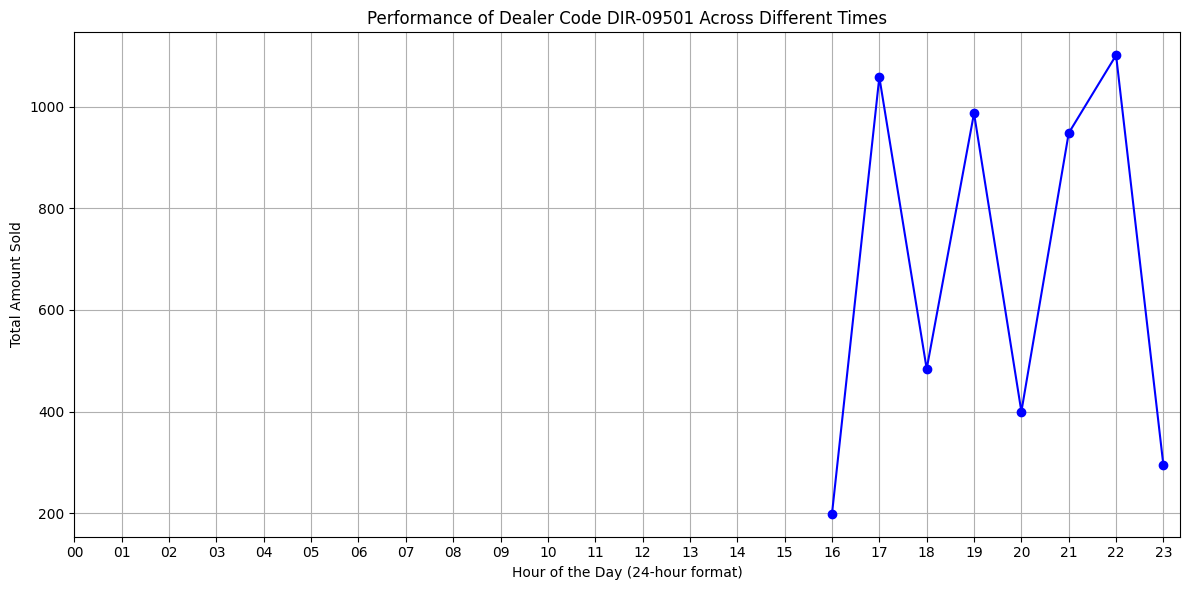

Line chart saved to: dealer_DIR-09501_performance_by_hour.png


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

def convert_to_24hr_format(time_obj):
    if isinstance(time_obj, str):
        try:
            dt = datetime.strptime(time_obj, '%I:%M:%S %p')
            return dt.hour
        except ValueError:
            print(f"Error processing time string: {time_obj}")
            return None
    elif isinstance(time_obj, time):
        return time_obj.hour
    else:
        print(f"Unsupported time format: {type(time_obj)}")
        return None

df['Activation Hour'] = df['Activation Time'].apply(convert_to_24hr_format)
df = df.dropna(subset=['Activation Hour'])
df['Activation Month'] = df['Activation Month'].astype(str)

dealer_codes = df['Dealer Code'].unique()

print("Available dealer codes:")
for i, dealer in enumerate(dealer_codes):
    print(f"{i + 1}: {dealer}")

dealer_selection = int(input("Enter the number corresponding to the Dealer Code: ")) - 1
if dealer_selection < 0 or dealer_selection >= len(dealer_codes):
    print("Invalid selection. Please select from the available options.")
    exit()

selected_dealer = dealer_codes[dealer_selection]
print(f"Selected Dealer Code: {selected_dealer}")

dealer_data = df[df['Dealer Code'] == selected_dealer]
performance_by_hour = dealer_data.groupby('Activation Hour').agg({
    'Initial Balance Recharge Amount Without VAT': 'sum'
}).reset_index()

performance_by_hour.sort_values('Activation Hour', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(performance_by_hour['Activation Hour'], performance_by_hour['Initial Balance Recharge Amount Without VAT'], marker='o', linestyle='-', color='b')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Total Amount Sold')
plt.title(f'Performance of Dealer Code {selected_dealer} Across Different Times')
plt.grid(True)

plt.xticks(ticks=range(24), labels=[f'{h:02}' for h in range(24)])

plt.tight_layout()

output_path = f'dealer_{selected_dealer}_performance_by_hour.png'
plt.savefig(output_path)
plt.show()

print(f"Line chart saved to: {output_path}")

In [24]:
!pip install pydeck

In [25]:
import pandas as pd
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime, time

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

def convert_to_24hr_format(time_obj):
    if isinstance(time_obj, str):
        try:
            dt = datetime.strptime(time_obj, '%I:%M:%S %p')
            return dt.hour
        except ValueError:
            print(f"Error processing time string: {time_obj}")
            return None
    elif isinstance(time_obj, time):
        return time_obj.hour
    else:
        print(f"Unsupported time format: {type(time_obj)}")
        return None

df['Activation Hour'] = df['Activation Time'].apply(convert_to_24hr_format)
df = df.dropna(subset=['Activation Hour'])
df['Activation Month'] = df['Activation Month'].astype(str)

nationalities = df['Nationality'].unique()

print("Available nationalities:")
for i, nationality in enumerate(nationalities):
    print(f"{i + 1}: {nationality}")

nationality_selection = int(input("Enter the number corresponding to the Nationality: ")) - 1
if nationality_selection < 0 or nationality_selection >= len(nationalities):
    print("Invalid selection. Please select from the available options.")
    exit()

selected_nationality = nationalities[nationality_selection]
print(f"Selected Nationality: {selected_nationality}")

filtered_df = df[df['Nationality'] == selected_nationality]

if filtered_df.empty:
    print("No data found for the specified nationality.")
    exit()

coords = filtered_df[['CAS Latitude', 'CAS Longitude']].values
if len(coords) == 0:
    print("No coordinates found for the specified nationality.")
    exit()

scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.002, min_samples=5)
filtered_df.loc[:, 'Cluster'] = dbscan.fit_predict(coords_scaled)

if 'Cluster' not in filtered_df.columns:
    print("Cluster column is missing from the DataFrame.")
    exit()

if 'Segment Brand' not in filtered_df.columns:
    print("Column 'Segment Brand' not found in DataFrame.")
    exit()

cluster_payments = filtered_df.groupby(['Cluster', 'CAS Latitude', 'CAS Longitude', 'Activation Month', 'Segment Brand']).agg({
    'Initial Balance Recharge Amount Without VAT': 'sum'
}).reset_index()

min_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].min()
max_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].max()
range_payment = max_payment - min_payment

cluster_payments['Elevation'] = (cluster_payments['Initial Balance Recharge Amount Without VAT'] - min_payment) / range_payment * 100

cluster_payments['Location'] = cluster_payments.apply(
    lambda row: f"Latitude: {row['CAS Latitude']}, Longitude: {row['CAS Longitude']}",
    axis=1
)

pydeck_layers = []

for _, row in cluster_payments.iterrows():
    column_layer = pdk.Layer(
        "ColumnLayer",
        data=[{
            "Latitude": row['CAS Latitude'],
            "Longitude": row['CAS Longitude'],
            "Elevation": row['Elevation'],
            "Total Payment": row['Initial Balance Recharge Amount Without VAT'],
            "Location": row['Location'],
            "Activation Month": row['Activation Month'],
            "Segment Brand": row['Segment Brand']
        }],
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=20,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )
    pydeck_layers.append(column_layer)

view_state = pdk.ViewState(
    latitude=filtered_df['CAS Latitude'].mean(),
    longitude=filtered_df['CAS Longitude'].mean(),
    zoom=10,
    pitch=45
)

r = pdk.Deck(
    layers=pydeck_layers,
    initial_view_state=view_state,
    tooltip={
        'html': '<b>Location:</b> {Location}<br><b>Total Payment:</b> {Total Payment}<br><b>Activation Month:</b> {Activation Month}<br><b>Segment Brand:</b> {Segment Brand}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }
)

output_path = f'nationality_{selected_nationality}_performance.html'
r.to_html(output_path)

print(f"Map saved to: {output_path}")


Available nationalities:
1: Egypt
2: Bangladesh
3: India
4: Nigeria
5: Pakistan
6: Saudi Arabia
7: Sudan
8: Yemen
9: Nepal
10: Bahrain
11: Ethiopia
12: Syria
13: Kenya
14: Philippines
15: Tunisia
16: Myanmar - Bangladish Passport
17: Myanmar - Resident
18: Morocco
19: Afghanistan
20: Indonesia
21: JORDAN
22: Libya
23: PALESTINIAN EGYPTIAN
24: Russia
25: Algeria
26: Lebanon
27: Turkey
28: Netherlands
29: Ghana
30: Sri Lanka
31: Uganda
32: United States
33: Sweden
34: Chad
35: China
36: Eritrea
37: Norway
38: Germany
39: Uzbekistan
40: Iraq
41: New Zealand
42: Finland
43: Kosovo
Enter the number corresponding to the Nationality: 33
Selected Nationality: Sweden


<ipython-input-25-4377943059cb>:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>

Map saved to: nationality_Sweden_performance.html


Available nationalities:
1: Egypt
2: Bangladesh
3: India
4: Nigeria
5: Pakistan
6: Saudi Arabia
7: Sudan
8: Yemen
9: Nepal
10: Bahrain
11: Ethiopia
12: Syria
13: Kenya
14: Philippines
15: Tunisia
16: Myanmar - Bangladish Passport
17: Myanmar - Resident
18: Morocco
19: Afghanistan
20: Indonesia
21: JORDAN
22: Libya
23: PALESTINIAN EGYPTIAN
24: Russia
25: Algeria
26: Lebanon
27: Turkey
28: Netherlands
29: Ghana
30: Sri Lanka
31: Uganda
32: United States
33: Sweden
34: Chad
35: China
36: Eritrea
37: Norway
38: Germany
39: Uzbekistan
40: Iraq
41: New Zealand
42: Finland
43: Kosovo
Enter the number corresponding to the Nationality: 23
Selected Nationality: PALESTINIAN EGYPTIAN


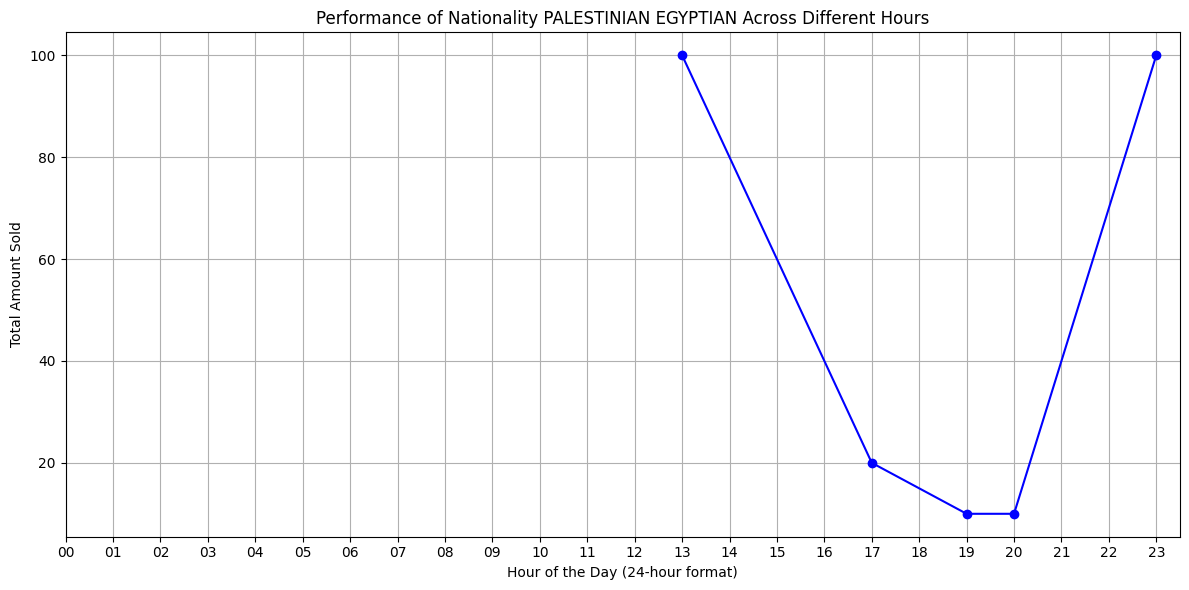

Line chart saved to: nationality_PALESTINIAN EGYPTIAN_performance_by_hour.png


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

def convert_to_24hr_format(time_obj):
    if isinstance(time_obj, str):
        try:
            dt = datetime.strptime(time_obj, '%I:%M:%S %p')
            return dt.hour
        except ValueError:
            print(f"Error processing time string: {time_obj}")
            return None
    elif isinstance(time_obj, time):
        return time_obj.hour
    else:
        print(f"Unsupported time format: {type(time_obj)}")
        return None

df['Activation Hour'] = df['Activation Time'].apply(convert_to_24hr_format)
df = df.dropna(subset=['Activation Hour'])
df['Activation Month'] = df['Activation Month'].astype(str)

nationalities = df['Nationality'].unique()

print("Available nationalities:")
for i, nationality in enumerate(nationalities):
    print(f"{i + 1}: {nationality}")

nationality_selection = int(input("Enter the number corresponding to the Nationality: ")) - 1
if nationality_selection < 0 or nationality_selection >= len(nationalities):
    print("Invalid selection. Please select from the available options.")
    exit()

selected_nationality = nationalities[nationality_selection]
print(f"Selected Nationality: {selected_nationality}")

nationality_data = df[df['Nationality'] == selected_nationality]
performance_by_hour = nationality_data.groupby('Activation Hour').agg({
    'Initial Balance Recharge Amount Without VAT': 'sum'
}).reset_index()

performance_by_hour.sort_values('Activation Hour', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(performance_by_hour['Activation Hour'], performance_by_hour['Initial Balance Recharge Amount Without VAT'], marker='o', linestyle='-', color='b')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Total Amount Sold')
plt.title(f'Performance of Nationality {selected_nationality} Across Different Hours')
plt.grid(True)

plt.xticks(ticks=range(24), labels=[f'{h:02}' for h in range(24)])

plt.tight_layout()

output_path = f'nationality_{selected_nationality}_performance_by_hour.png'
plt.savefig(output_path)
plt.show()

print(f"Line chart saved to: {output_path}")


Choose a dealer code identifier from the following list:
1: DIR-07970
2: DIR-08070
3: DIR-08196
4: DIR-08197
5: DIR-09162
6: DIR-09163
7: DIR-09165
8: DIR-09501
9: DIR-09503
10: DIR-10946
11: DIR-11173
12: DIR-11691
13: DIR-11696
14: DIR-11698
15: DIR-11701
16: DIR-12381
17: DIR-12391
18: DIR-12420
19: DIR-12455
20: DIR-12456
21: DIR-12461
22: DIR-12504
23: DIR-12506
24: DIR-12516
25: DIR-12517
26: DIR-12541
27: DIR-12579
28: DIR-12580
29: DIR-12581
30: DIR-17372
Enter the chosen identifier: 3


<IPython.core.display.Javascript object>

Map for chosen dealer saved to: filtered_cluster_dealer_column_chart.html
Available clusters for dealer DIR-08196: [9, 5]
Enter the chosen cluster: 5


<ipython-input-27-6069108f79f8>:169: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



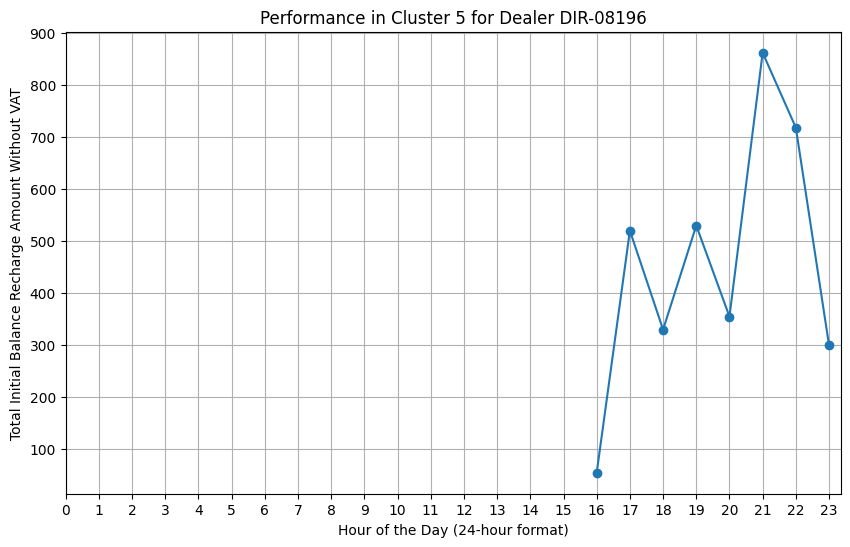

Performance chart for cluster 5 saved as 'cluster_performance_chart.png'


In [27]:
import pandas as pd
import numpy as np
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

city_payments = {}
for city in cities:
    city_payments[city] = {
        'Count': 0,
        'Total Payment': 0,
        'FRiENDi mobile Count': 0,
        'Virgin Mobile Count': 0,
        'Points': [],
        'Highest Payment': {
            'Amount': 0,
            'Latitude': None,
            'Longitude': None,
            'Segment Brand': None
        },
        'Cluster Labels': set()
    }

for index, row in df.iterrows():
    min_distance = float('inf')
    closest_city = None
    for city, (city_lat, city_lon) in cities.items():
        distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
        if distance < min_distance:
            min_distance = distance
            closest_city = city
    if closest_city:
        city_payments[closest_city]['Count'] += 1
        city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
        point_info = {
            'Initial Balance': row['Initial Balance Recharge Amount Without VAT'],
            'Segment Brand': row['Segment Brand'],
            'Latitude': row['CAS Latitude'],
            'Longitude': row['CAS Longitude']
        }
        city_payments[closest_city]['Points'].append(point_info)
        if row['Segment Brand'] == 'FRiENDi mobile':
            city_payments[closest_city]['FRiENDi mobile Count'] += 1
        elif row['Segment Brand'] == 'Virgin Mobile':
            city_payments[closest_city]['Virgin Mobile Count'] += 1
        if row['Initial Balance Recharge Amount Without VAT'] > city_payments[closest_city]['Highest Payment']['Amount']:
            city_payments[closest_city]['Highest Payment'] = {
                'Amount': row['Initial Balance Recharge Amount Without VAT'],
                'Latitude': row['CAS Latitude'],
                'Longitude': row['CAS Longitude'],
                'Segment Brand': row['Segment Brand']
            }

coords = df[['CAS Latitude', 'CAS Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.002, min_samples=5)
df['Cluster'] = dbscan.fit_predict(coords_scaled)

cluster_dealer_payments = {}

for cluster_label in df['Cluster'].unique():
    if cluster_label == -1:
        continue

    cluster_data = df[df['Cluster'] == cluster_label]
    dealer_highest_payment = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().idxmax()
    highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

    cluster_dealer_payments[cluster_label] = {
        'Cluster': cluster_label,
        'Dealer Code': dealer_highest_payment,
        'Highest Payment Amount': highest_payment_amount,
        'Latitude': cluster_data['CAS Latitude'].mean(),
        'Longitude': cluster_data['CAS Longitude'].mean(),
    }

cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
cluster_dealer_df.columns = ['index', 'Cluster', 'Dealer Code', 'Highest Payment Amount', 'Latitude', 'Longitude']

min_payment = cluster_dealer_df['Highest Payment Amount'].min()
max_payment = cluster_dealer_df['Highest Payment Amount'].max()
range_payment = max_payment - min_payment

cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

dealer_clusters = df.groupby('Dealer Code')['Cluster'].apply(set).reset_index()
dealer_clusters['Cluster'] = dealer_clusters['Cluster'].apply(list)
dealer_clusters = dealer_clusters.sort_values(by='Dealer Code')

dealer_mapping = {str(index): dealer_code for index, dealer_code in enumerate(dealer_clusters['Dealer Code'].unique(), start=1)}

print("Choose a dealer code identifier from the following list:")
for key, value in dealer_mapping.items():
    print(f"{key}: {value}")
chosen_identifier = input("Enter the chosen identifier: ")

if chosen_identifier not in dealer_mapping:
    print("Invalid identifier. Exiting.")
    exit()

chosen_dealer_code = dealer_mapping[chosen_identifier]

chosen_clusters = dealer_clusters[dealer_clusters['Dealer Code'] == chosen_dealer_code]['Cluster'].values[0]

filtered_cluster_dealer_df = cluster_dealer_df[cluster_dealer_df['Cluster'].isin(chosen_clusters)]

view_state = pdk.ViewState(
    latitude=filtered_cluster_dealer_df['Latitude'].mean(),
    longitude=filtered_cluster_dealer_df['Longitude'].mean(),
    zoom=5,
    pitch=45
)

column_layer = pdk.Layer(
    "ColumnLayer",
    data=filtered_cluster_dealer_df,
    get_position=["Longitude", "Latitude"],
    get_elevation="Elevation",
    elevation_scale=50,
    radius=500,
    get_fill_color=[255, 0, 0, 180],
    pickable=True,
    auto_highlight=True,
)

tooltip = {
    'html': '<b>Cluster:</b> {Cluster}<br><b>Dealer Code:</b> {Dealer Code}<br><b>Highest Payment:</b> {Highest Payment Amount}',
    'style': {
        'backgroundColor': 'steelblue',
        'color': 'white'
    }
}

r = pdk.Deck(
    layers=[column_layer],
    initial_view_state=view_state,
    tooltip=tooltip,
)

output_path = 'filtered_cluster_dealer_column_chart.html'
r.to_html(output_path)

print(f"Map for chosen dealer saved to: {output_path}")

print(f"Available clusters for dealer {chosen_dealer_code}: {chosen_clusters}")
chosen_cluster = int(input("Enter the chosen cluster: "))

if chosen_cluster not in chosen_clusters:
    print("Invalid cluster. Exiting.")
    exit()

cluster_data = df[df['Cluster'] == chosen_cluster]

cluster_data['Activation Hour'] = pd.to_datetime(cluster_data['Activation Time'], format='%H:%M:%S').dt.hour

hourly_payments = cluster_data.groupby('Activation Hour')['Initial Balance Recharge Amount Without VAT'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_payments['Activation Hour'], hourly_payments['Initial Balance Recharge Amount Without VAT'], marker='o')
plt.title(f"Performance in Cluster {chosen_cluster} for Dealer {chosen_dealer_code}")
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Total Initial Balance Recharge Amount Without VAT")
plt.grid(True)
plt.xticks(range(0, 24))
plt.savefig('cluster_performance_chart.png')
plt.show()

print(f"Performance chart for cluster {chosen_cluster} saved as 'cluster_performance_chart.png'")

In [28]:
import pandas as pd
import numpy as np
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime, time
import matplotlib.pyplot as plt

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

def dealer_highest_payment_location():
    dealer_highest_payment_location = {}

    for dealer, dealer_data in df.groupby('Dealer Code'):
        max_payment = dealer_data['Initial Balance Recharge Amount Without VAT'].max()
        max_payment_row = dealer_data[dealer_data['Initial Balance Recharge Amount Without VAT'] == max_payment].iloc[0]

        dealer_highest_payment_location[dealer] = {
            'Dealer Code': dealer,
            'Total Payment': max_payment,
            'Latitude': max_payment_row['CAS Latitude'],
            'Longitude': max_payment_row['CAS Longitude']
        }

    pydeck_layers = []

    for dealer, data in dealer_highest_payment_location.items():
        column_layer = pdk.Layer(
            "ColumnLayer",
            data=[{
                "Latitude": data['Latitude'],
                "Longitude": data['Longitude'],
                "Elevation": 100,
                "color": [255, 0, 0, 180],
                "Dealer Code": data['Dealer Code'],
                "Total Payment": data['Total Payment']
            }],
            get_position=["Longitude", "Latitude"],
            get_elevation="Elevation",
            elevation_scale=50,
            radius=150,
            get_fill_color=[255, 0, 0, 180],
            pickable=True,
            auto_highlight=True,
        )

        pydeck_layers.append(column_layer)

    view_state = pdk.ViewState(
        latitude=df['CAS Latitude'].mean(),
        longitude=df['CAS Longitude'].mean(),
        zoom=5,
        pitch=45
    )

    r = pdk.Deck(
        layers=pydeck_layers,
        initial_view_state=view_state,
        tooltip={
            'html': '<b>Dealer Code:</b> {Dealer Code}<br><b>Total Payment:</b> {Total Payment}',
            'style': {
                'backgroundColor': 'steelblue',
                'color': 'white'
            }
        }
    )

    output_path = 'dealer_highest_payment_locations.html'
    r.to_html(output_path)
    print(f"Map saved to: {output_path}")

def customer_payments_by_id_type():
    customer_id_type = input("Enter the Customer ID Type: ")
    customer_df = df[df['Customer ID Type'] == customer_id_type]

    if customer_df.empty:
        print("No data found for the specified Customer ID Type.")
        return

    coords = customer_df[['CAS Latitude', 'CAS Longitude']].values
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    dbscan = DBSCAN(eps=0.002, min_samples=5)
    customer_df['Cluster'] = dbscan.fit_predict(coords_scaled)

    cluster_payments = customer_df.groupby('Cluster').agg({
        'Initial Balance Recharge Amount Without VAT': 'sum',
        'CAS Latitude': 'mean',
        'CAS Longitude': 'mean'
    }).reset_index()

    min_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].min()
    max_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].max()
    range_payment = max_payment - min_payment

    cluster_payments['Elevation'] = cluster_payments['Initial Balance Recharge Amount Without VAT'].apply(
        lambda x: (x - min_payment) / range_payment * 100
    )

    pydeck_layers = []

    for _, row in cluster_payments.iterrows():
        column_layer = pdk.Layer(
            "ColumnLayer",
            data=[{
                "Latitude": row['CAS Latitude'],
                "Longitude": row['CAS Longitude'],
                "Elevation": row['Elevation'],
                "Total Payment": row['Initial Balance Recharge Amount Without VAT'],
                "Location": f"Latitude: {row['CAS Latitude']}, Longitude: {row['CAS Longitude']}"
            }],
            get_position=["Longitude", "Latitude"],
            get_elevation="Elevation",
            elevation_scale=50,
            radius=1000,
            get_fill_color=[255, 0, 0, 180],
            pickable=True,
            auto_highlight=True,
        )
        pydeck_layers.append(column_layer)

    view_state = pdk.ViewState(
        latitude=customer_df['CAS Latitude'].mean(),
        longitude=customer_df['CAS Longitude'].mean(),
        zoom=10,
        pitch=45
    )

    r = pdk.Deck(
        layers=pydeck_layers,
        initial_view_state=view_state,
        tooltip={
            'html': '<b>Location:</b> {Location}<br><b>Total Payment:</b> {Total Payment}',
            'style': {
                'backgroundColor': 'steelblue',
                'color': 'white'
            }
        }
    )

    output_path = f'customer_{customer_id_type}_payments.html'
    r.to_html(output_path)
    print(f"Map saved to: {output_path}")

def payments_by_hour():
    print(df['Activation Time'].dtype)

    def extract_hour(time_obj):
        if isinstance(time_obj, time):
            return time_obj.hour
        elif isinstance(time_obj, str):
            return datetime.strptime(time_obj, '%I:%M:%S %p').hour
        else:
            raise ValueError("Unsupported time format")

    df['Activation Hour'] = df['Activation Time'].apply(extract_hour)
    unique_hours = sorted(df['Activation Hour'].unique())

    print("Available hours:")
    for i, hour in enumerate(unique_hours):
        print(f"{i + 1}: {hour}:00")

    selection = int(input("Enter the number corresponding to the hour of the day: ")) - 1

    if selection < 0 or selection >= len(unique_hours):
        print("Invalid selection. Please select from the available options.")
        return

    selected_hour = unique_hours[selection]
    print(f"Selected hour: {selected_hour}:00")

    filtered_df = df[df['Activation Hour'] == selected_hour]

    if filtered_df.empty:
        print("No data found for the specified hour.")
        return

    coords = filtered_df[['CAS Latitude', 'CAS Longitude']].values
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    dbscan = DBSCAN(eps=0.002, min_samples=5)
    filtered_df['Cluster'] = dbscan.fit_predict(coords_scaled)

    cluster_payments = filtered_df.groupby(['Cluster', 'CAS Latitude', 'CAS Longitude']).agg({
        'Initial Balance Recharge Amount Without VAT': 'sum'
    }).reset_index()

    min_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].min()
    max_payment = cluster_payments['Initial Balance Recharge Amount Without VAT'].max()
    range_payment = max_payment - min_payment
    cluster_payments['Elevation'] = (cluster_payments['Initial Balance Recharge Amount Without VAT'] - min_payment) / range_payment * 100

    pydeck_layers = []

    for _, row in cluster_payments.iterrows():
        column_layer = pdk.Layer(
            "ColumnLayer",
            data=[{
                "Latitude": row['CAS Latitude'],
                "Longitude": row['CAS Longitude'],
                "Elevation": row['Elevation'],
                "Total Payment": row['Initial Balance Recharge Amount Without VAT'],
                "Location": f"Latitude: {row['CAS Latitude']}, Longitude: {row['CAS Longitude']}"
            }],
            get_position=["Longitude", "Latitude"],
            get_elevation="Elevation",
            elevation_scale=50,
            radius=1000,
            get_fill_color=[255, 0, 0, 180],
            pickable=True,
            auto_highlight=True,
        )
        pydeck_layers.append(column_layer)

    view_state = pdk.ViewState(
        latitude=filtered_df['CAS Latitude'].mean(),
        longitude=filtered_df['CAS Longitude'].mean(),
        zoom=10,
        pitch=45
    )

    r = pdk.Deck(
        layers=pydeck_layers,
        initial_view_state=view_state,
        tooltip={
            'html': '<b>Location:</b> {Location}<br><b>Total Payment:</b> {Total Payment}',
            'style': {
                'backgroundColor': 'steelblue',
                'color': 'white'
            }
        }
    )

    output_path = f'payments_by_hour_{selected_hour}.html'
    r.to_html(output_path)
    print(f"Map saved to: {output_path}")

def performance_by_city():
    city_payments = {}
    for city in cities:
        city_payments[city] = {
            'Count': 0,
            'Total Payment': 0,
            'FRiENDi mobile Count': 0,
            'Virgin Mobile Count': 0,
            'Points': [],
            'Highest Payment': {
                'Amount': 0,
                'Latitude': None,
                'Longitude': None,
                'Segment Brand': None
            }
        }

    for index, row in df.iterrows():
        min_distance = float('inf')
        closest_city = None
        for city, (city_lat, city_lon) in cities.items():
            distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
            if distance < min_distance:
                min_distance = distance
                closest_city = city
        if closest_city:
            city_payments[closest_city]['Count'] += 1
            city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
            point_info = {
                'Initial Balance': row['Initial Balance Recharge Amount Without VAT'],
                'Segment Brand': row['Segment Brand'],
                'Latitude': row['CAS Latitude'],
                'Longitude': row['CAS Longitude']
            }
            city_payments[closest_city]['Points'].append(point_info)
            if row['Initial Balance Recharge Amount Without VAT'] > city_payments[closest_city]['Highest Payment']['Amount']:
                city_payments[closest_city]['Highest Payment'] = {
                    'Amount': row['Initial Balance Recharge Amount Without VAT'],
                    'Latitude': row['CAS Latitude'],
                    'Longitude': row['CAS Longitude'],
                    'Segment Brand': row['Segment Brand']
                }

    city_data = []
    for city, data in city_payments.items():
        city_data.append({
            'City': city,
            'Total Payment': data['Total Payment'],
            'Latitude': cities[city][0],
            'Longitude': cities[city][1],
            'Highest Payment Amount': data['Highest Payment']['Amount'],
            'Elevation': min(max((data['Highest Payment']['Amount'] - min_payment) / range_payment * 100, 0), 100),
            'Color': [255, 0, 0, 180] if data['Total Payment'] > 0 else [200, 200, 200, 180]
        })

    city_df = pd.DataFrame(city_data)

    view_state = pdk.ViewState(
        latitude=city_df['Latitude'].mean(),
        longitude=city_df['Longitude'].mean(),
        zoom=6,
        pitch=45
    )

    column_layer = pdk.Layer(
        "ColumnLayer",
        data=city_df,
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=5000,
        get_fill_color="Color",
        pickable=True,
        auto_highlight=True,
    )

    tooltip = {
        'html': '<b>City:</b> {City}<br><b>Total Payment:</b> {Total Payment}<br><b>Highest Payment:</b> {Highest Payment Amount}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }

    r = pdk.Deck(
        layers=[column_layer],
        initial_view_state=view_state,
        tooltip=tooltip,
    )

    output_path = 'performance_by_city.html'
    r.to_html(output_path)

    print(f"Map for performance by city saved to: {output_path}")


def performance_for_dealer():
    coords = df[['CAS Latitude', 'CAS Longitude']].values
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    dbscan = DBSCAN(eps=0.002, min_samples=5)
    df['Cluster'] = dbscan.fit_predict(coords_scaled)

    cluster_dealer_payments = {}

    for cluster_label in df['Cluster'].unique():
        if cluster_label == -1:
            continue

        cluster_data = df[df['Cluster'] == cluster_label]
        dealer_highest_payment = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().idxmax()
        highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

        cluster_dealer_payments[cluster_label] = {
            'Cluster': cluster_label,
            'Dealer Code': dealer_highest_payment,
            'Highest Payment Amount': highest_payment_amount,
            'Latitude': cluster_data['CAS Latitude'].mean(),
            'Longitude': cluster_data['CAS Longitude'].mean(),
        }

    cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
    cluster_dealer_df.columns = ['index', 'Cluster', 'Dealer Code', 'Highest Payment Amount', 'Latitude', 'Longitude']

    min_payment = cluster_dealer_df['Highest Payment Amount'].min()
    max_payment = cluster_dealer_df['Highest Payment Amount'].max()
    range_payment = max_payment - min_payment

    cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

    dealer_clusters = df.groupby('Dealer Code')['Cluster'].apply(set).reset_index()
    dealer_clusters['Cluster'] = dealer_clusters['Cluster'].apply(list)
    dealer_clusters = dealer_clusters.sort_values(by='Dealer Code')

    dealer_mapping = {str(index): dealer_code for index, dealer_code in enumerate(dealer_clusters['Dealer Code'].unique(), start=1)}

    print("Choose a dealer code identifier from the following list:")
    for key, value in dealer_mapping.items():
        print(f"{key}: {value}")
    chosen_identifier = input("Enter the chosen identifier: ")

    if chosen_identifier not in dealer_mapping:
        print("Invalid identifier. Exiting.")
        return

    chosen_dealer_code = dealer_mapping[chosen_identifier]

    chosen_clusters = dealer_clusters[dealer_clusters['Dealer Code'] == chosen_dealer_code]['Cluster'].values[0]

    filtered_cluster_dealer_df = cluster_dealer_df[cluster_dealer_df['Cluster'].isin(chosen_clusters)]

    view_state = pdk.ViewState(
        latitude=filtered_cluster_dealer_df['Latitude'].mean(),
        longitude=filtered_cluster_dealer_df['Longitude'].mean(),
        zoom=5,
        pitch=45
    )

    column_layer = pdk.Layer(
        "ColumnLayer",
        data=filtered_cluster_dealer_df,
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=500,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )

    tooltip = {
        'html': '<b>Cluster:</b> {Cluster}<br><b>Dealer Code:</b> {Dealer Code}<br><b>Highest Payment:</b> {Highest Payment Amount}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }

    r = pdk.Deck(
        layers=[column_layer],
        initial_view_state=view_state,
        tooltip=tooltip,
    )

    output_path = 'filtered_cluster_dealer_column_chart.html'
    r.to_html(output_path)

    print(f"Map for chosen dealer saved to: {output_path}")

    print(f"Available clusters for dealer {chosen_dealer_code}: {chosen_clusters}")
    chosen_cluster = int(input("Enter the chosen cluster: "))

    if chosen_cluster not in chosen_clusters:
        print("Invalid cluster. Exiting.")
        return

    cluster_data = df[df['Cluster'] == chosen_cluster]

    cluster_data['Activation Hour'] = pd.to_datetime(cluster_data['Activation Time'], format='%H:%M:%S').dt.hour

    hourly_payments = cluster_data.groupby('Activation Hour')['Initial Balance Recharge Amount Without VAT'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(hourly_payments['Activation Hour'], hourly_payments['Initial Balance Recharge Amount Without VAT'], marker='o')
    plt.title(f"Performance in Cluster {chosen_cluster} for Dealer {chosen_dealer_code}")
    plt.xlabel("Hour of the Day (24-hour format)")
    plt.ylabel("Total Initial Balance Recharge Amount Without VAT")
    plt.grid(True)
    plt.xticks(range(0, 24))
    plt.savefig('cluster_performance_chart.png')
    plt.show()

    print(f"Performance chart for cluster {chosen_cluster} saved as 'cluster_performance_chart.png'")

def main():
    print("Choose an option:")
    print("1. Dealer highest payment location")
    print("2. Customer payments by ID type")
    print("3. Payments by hour")
    print("4. Performance by city")
    print("5. Performance for dealer")

    choice = input("Enter your choice: ")

    if choice == "1":
        dealer_highest_payment_location()
    elif choice == "2":
        customer_payments_by_id_type()
    elif choice == "3":
        payments_by_hour()
    elif choice == "4":
        performance_by_city()
    elif choice == "5":
        performance_for_dealer()
    else:
        print("Invalid choice. Exiting.")

if __name__ == "__main__":
    main()

Choose an option:
1. Dealer highest payment location
2. Customer payments by ID type
3. Payments by hour
4. Performance by city
5. Performance for dealer
Enter your choice: 3
object
Available hours:
1: 0:00
2: 1:00
3: 9:00
4: 10:00
5: 11:00
6: 12:00
7: 13:00
8: 14:00
9: 15:00
10: 16:00
11: 17:00
12: 18:00
13: 19:00
14: 20:00
15: 21:00
16: 22:00
17: 23:00
Enter the number corresponding to the hour of the day: 15
Selected hour: 21:00


<ipython-input-28-3173fb4f8434>:194: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>

Map saved to: payments_by_hour_21.html


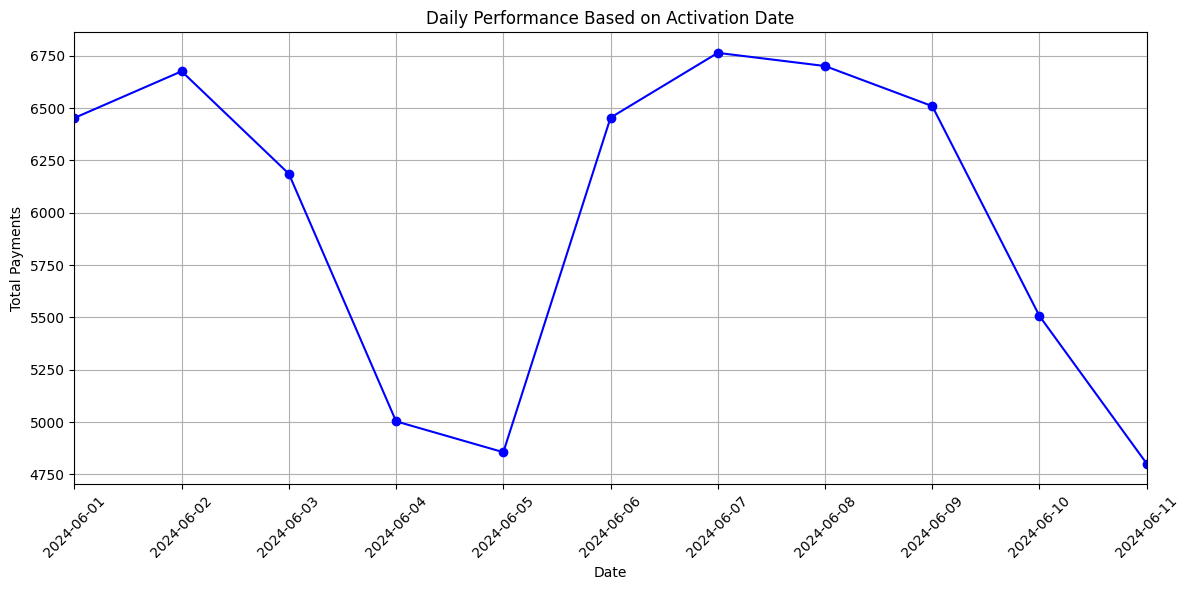

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

df['Activation Date'] = pd.to_datetime(df['Activation Date'])

daily_performance = df.groupby('Activation Date')['Initial Balance Recharge Amount Without VAT'].sum()


plt.figure(figsize=(12, 6))
daily_performance.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Daily Performance Based on Activation Date')
plt.xlabel('Date')
plt.ylabel('Total Payments')
plt.grid(True)

date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Choose a dealer code identifier from the following list:
1: DIR-07970
2: DIR-08070
3: DIR-08196
4: DIR-08197
5: DIR-09162
6: DIR-09163
7: DIR-09165
8: DIR-09501
9: DIR-09503
10: DIR-10946
11: DIR-11173
12: DIR-11691
13: DIR-11696
14: DIR-11698
15: DIR-11701
16: DIR-12381
17: DIR-12391
18: DIR-12420
19: DIR-12455
20: DIR-12456
21: DIR-12461
22: DIR-12504
23: DIR-12506
24: DIR-12516
25: DIR-12517
26: DIR-12541
27: DIR-12579
28: DIR-12580
29: DIR-12581
30: DIR-17372
Enter the chosen identifier: 10


<IPython.core.display.Javascript object>

Map for chosen dealer saved to: filtered_cluster_dealer_column_chart.html
Available clusters for dealer DIR-10946: [0]
Enter the chosen cluster: 0


<ipython-input-30-5ebea81eca75>:115: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



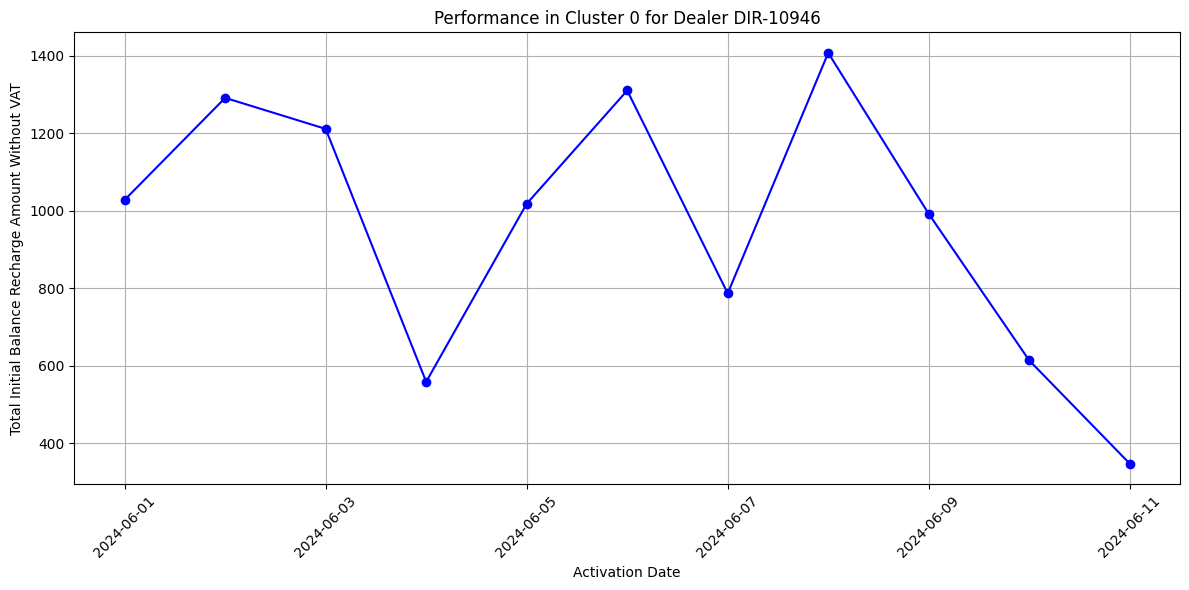

Performance chart for cluster 0 saved as 'cluster_performance_chart.png'


In [30]:
import pandas as pd
import numpy as np
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

coords = df[['CAS Latitude', 'CAS Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.002, min_samples=5)
df['Cluster'] = dbscan.fit_predict(coords_scaled)

cluster_dealer_payments = {}
for cluster_label in df['Cluster'].unique():
    if cluster_label == -1:
        continue

    cluster_data = df[df['Cluster'] == cluster_label]
    dealer_highest_payment = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().idxmax()
    highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

    cluster_dealer_payments[cluster_label] = {
        'Cluster': cluster_label,
        'Dealer Code': dealer_highest_payment,
        'Highest Payment Amount': highest_payment_amount,
        'Latitude': cluster_data['CAS Latitude'].mean(),
        'Longitude': cluster_data['CAS Longitude'].mean(),
    }

cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
cluster_dealer_df.columns = ['index', 'Cluster', 'Dealer Code', 'Highest Payment Amount', 'Latitude', 'Longitude']

min_payment = cluster_dealer_df['Highest Payment Amount'].min()
max_payment = cluster_dealer_df['Highest Payment Amount'].max()
range_payment = max_payment - min_payment

cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

dealer_clusters = df.groupby('Dealer Code')['Cluster'].apply(set).reset_index()
dealer_clusters['Cluster'] = dealer_clusters['Cluster'].apply(list)
dealer_clusters = dealer_clusters.sort_values(by='Dealer Code')

dealer_mapping = {str(index): dealer_code for index, dealer_code in enumerate(dealer_clusters['Dealer Code'].unique(), start=1)}

print("Choose a dealer code identifier from the following list:")
for key, value in dealer_mapping.items():
    print(f"{key}: {value}")
chosen_identifier = input("Enter the chosen identifier: ")

if chosen_identifier not in dealer_mapping:
    print("Invalid identifier. Exiting.")
    exit()

chosen_dealer_code = dealer_mapping[chosen_identifier]

chosen_clusters = dealer_clusters[dealer_clusters['Dealer Code'] == chosen_dealer_code]['Cluster'].values[0]

filtered_cluster_dealer_df = cluster_dealer_df[cluster_dealer_df['Cluster'].isin(chosen_clusters)]

view_state = pdk.ViewState(
    latitude=filtered_cluster_dealer_df['Latitude'].mean(),
    longitude=filtered_cluster_dealer_df['Longitude'].mean(),
    zoom=5,
    pitch=45
)

column_layer = pdk.Layer(
    "ColumnLayer",
    data=filtered_cluster_dealer_df,
    get_position=["Longitude", "Latitude"],
    get_elevation="Elevation",
    elevation_scale=50,
    radius=500,
    get_fill_color=[255, 0, 0, 180],
    pickable=True,
    auto_highlight=True,
)

tooltip = {
    'html': '<b>Cluster:</b> {Cluster}<br><b>Dealer Code:</b> {Dealer Code}<br><b>Highest Payment:</b> {Highest Payment Amount}',
    'style': {
        'backgroundColor': 'steelblue',
        'color': 'white'
    }
}

r = pdk.Deck(
    layers=[column_layer],
    initial_view_state=view_state,
    tooltip=tooltip,
)

output_path = 'filtered_cluster_dealer_column_chart.html'
r.to_html(output_path)

print(f"Map for chosen dealer saved to: {output_path}")

print(f"Available clusters for dealer {chosen_dealer_code}: {chosen_clusters}")
chosen_cluster = int(input("Enter the chosen cluster: "))

if chosen_cluster not in chosen_clusters:
    print("Invalid cluster. Exiting.")
    exit()

cluster_data = df[df['Cluster'] == chosen_cluster]

cluster_data['Activation Date'] = pd.to_datetime(cluster_data['Activation Date'])

daily_payments = cluster_data.groupby('Activation Date')['Initial Balance Recharge Amount Without VAT'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_payments['Activation Date'], daily_payments['Initial Balance Recharge Amount Without VAT'], marker='o', linestyle='-', color='b')
plt.title(f"Performance in Cluster {chosen_cluster} for Dealer {chosen_dealer_code}")
plt.xlabel("Activation Date")
plt.ylabel("Total Initial Balance Recharge Amount Without VAT")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cluster_performance_chart.png')
plt.show()

print(f"Performance chart for cluster {chosen_cluster} saved as 'cluster_performance_chart.png'")

Choose a unique payment identifier from the following list:
1: 10.0
2: 99.0
3: 100.0
4: 85.0
5: 110.0
6: 30.0
7: 70.0
8: 175.01
9: 29.99
10: 45.0
11: 150.01
12: 55.0
13: 43.49
14: 99.13
15: 15.0
16: 26.0
17: 12.99
18: 17.0
19: 0.0
20: 380.02
21: 20.0
Enter the chosen identifier: 7


<IPython.core.display.Javascript object>

Map for chosen payment saved to: filtered_cluster_dealer_column_chart.html
Available clusters for chosen payment 70.0: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 17 18 19 20 21]
Enter the chosen cluster: 2


<ipython-input-31-f6351fac84a2>:113: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



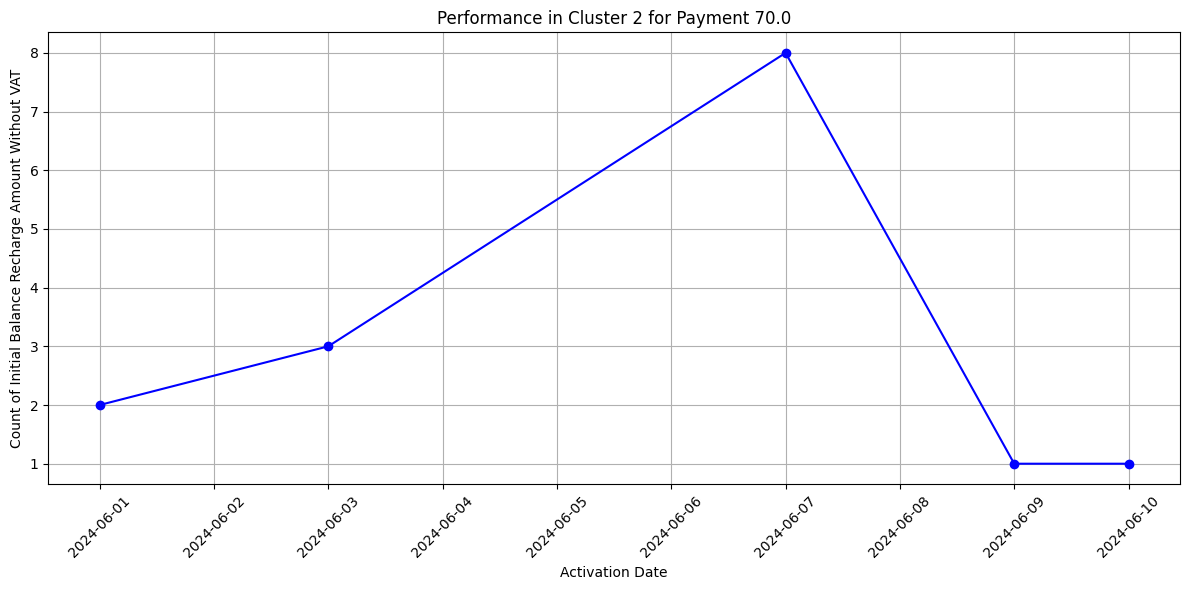

Performance chart for cluster 2 saved as 'cluster_performance_chart.png'


In [31]:
import pandas as pd
import numpy as np
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

coords = df[['CAS Latitude', 'CAS Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)


dbscan = DBSCAN(eps=0.002, min_samples=5)
df['Cluster'] = dbscan.fit_predict(coords_scaled)

cluster_dealer_payments = {}
for cluster_label in df['Cluster'].unique():
    if cluster_label == -1:
        continue

    cluster_data = df[df['Cluster'] == cluster_label]
    unique_payments = cluster_data['Initial Balance Recharge Amount Without VAT'].unique()
    highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

    cluster_dealer_payments[cluster_label] = {
        'Cluster': cluster_label,
        'Unique Payments': unique_payments,
        'Highest Payment Amount': highest_payment_amount,
        'Latitude': cluster_data['CAS Latitude'].mean(),
        'Longitude': cluster_data['CAS Longitude'].mean(),
    }

cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
cluster_dealer_df.columns = ['index', 'Cluster', 'Unique Payments', 'Highest Payment Amount', 'Latitude', 'Longitude']

min_payment = cluster_dealer_df['Highest Payment Amount'].min()
max_payment = cluster_dealer_df['Highest Payment Amount'].max()
range_payment = max_payment - min_payment

cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

unique_payments = df['Initial Balance Recharge Amount Without VAT'].unique()

payment_mapping = {str(index): payment for index, payment in enumerate(unique_payments, start=1)}

print("Choose a unique payment identifier from the following list:")
for key, value in payment_mapping.items():
    print(f"{key}: {value}")
chosen_identifier = input("Enter the chosen identifier: ")

if chosen_identifier not in payment_mapping:
    print("Invalid identifier. Exiting.")
    exit()

chosen_payment = payment_mapping[chosen_identifier]

chosen_clusters = cluster_dealer_df[cluster_dealer_df['Unique Payments'].apply(lambda x: chosen_payment in x)]['Cluster'].values

filtered_cluster_dealer_df = cluster_dealer_df[cluster_dealer_df['Cluster'].isin(chosen_clusters)]

view_state = pdk.ViewState(
    latitude=filtered_cluster_dealer_df['Latitude'].mean(),
    longitude=filtered_cluster_dealer_df['Longitude'].mean(),
    zoom=5,
    pitch=45
)
column_layer = pdk.Layer(
    "ColumnLayer",
    data=filtered_cluster_dealer_df[['Longitude', 'Latitude', 'Elevation', 'Cluster', 'Highest Payment Amount']],
    get_position=["Longitude", "Latitude"],
    get_elevation="Elevation",
    elevation_scale=50,
    radius=500,
    get_fill_color=[255, 0, 0, 180],
    pickable=True,
    auto_highlight=True,
)

tooltip = {
    'html': '<b>Cluster:</b> {Cluster}<br><b>Highest Payment:</b> {Highest Payment Amount}',
    'style': {
        'backgroundColor': 'steelblue',
        'color': 'white'
    }
}

r = pdk.Deck(
    layers=[column_layer],
    initial_view_state=view_state,
    tooltip=tooltip,
)

output_path = 'filtered_cluster_dealer_column_chart.html'
r.to_html(output_path)

print(f"Map for chosen payment saved to: {output_path}")

print(f"Available clusters for chosen payment {chosen_payment}: {chosen_clusters}")
chosen_cluster = int(input("Enter the chosen cluster: "))

if chosen_cluster not in chosen_clusters:
    print("Invalid cluster. Exiting.")
    exit()

cluster_data = df[df['Cluster'] == chosen_cluster]

cluster_data['Activation Date'] = pd.to_datetime(cluster_data['Activation Date'])

filtered_data = cluster_data[cluster_data['Initial Balance Recharge Amount Without VAT'] == chosen_payment]

daily_counts = filtered_data.groupby('Activation Date').size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
plt.plot(daily_counts['Activation Date'], daily_counts['Count'], marker='o', linestyle='-', color='b')
plt.title(f"Performance in Cluster {chosen_cluster} for Payment {chosen_payment}")
plt.xlabel("Activation Date")
plt.ylabel("Count of Initial Balance Recharge Amount Without VAT")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cluster_performance_chart.png')
plt.show()

print(f"Performance chart for cluster {chosen_cluster} saved as 'cluster_performance_chart.png'")

Choose a date index from the following list:
1: 2024-06-01
2: 2024-06-02
3: 2024-06-03
4: 2024-06-04
5: 2024-06-05
6: 2024-06-06
7: 2024-06-07
8: 2024-06-08
9: 2024-06-09
10: 2024-06-10
11: 2024-06-11
Enter the chosen date index: 3

Payment Identifier Counts for chosen date:
   Payment Identifier  Count
0               10.00     46
1              100.00     24
2               70.00     10
3               99.00      8
4               85.00      7
5              110.00      6
6               29.99      6
7              150.01      2
8               99.13      1

Most Sold Payment Identifier on 2024-06-03:
Payment Identifier: 10.0
Count: 46.0


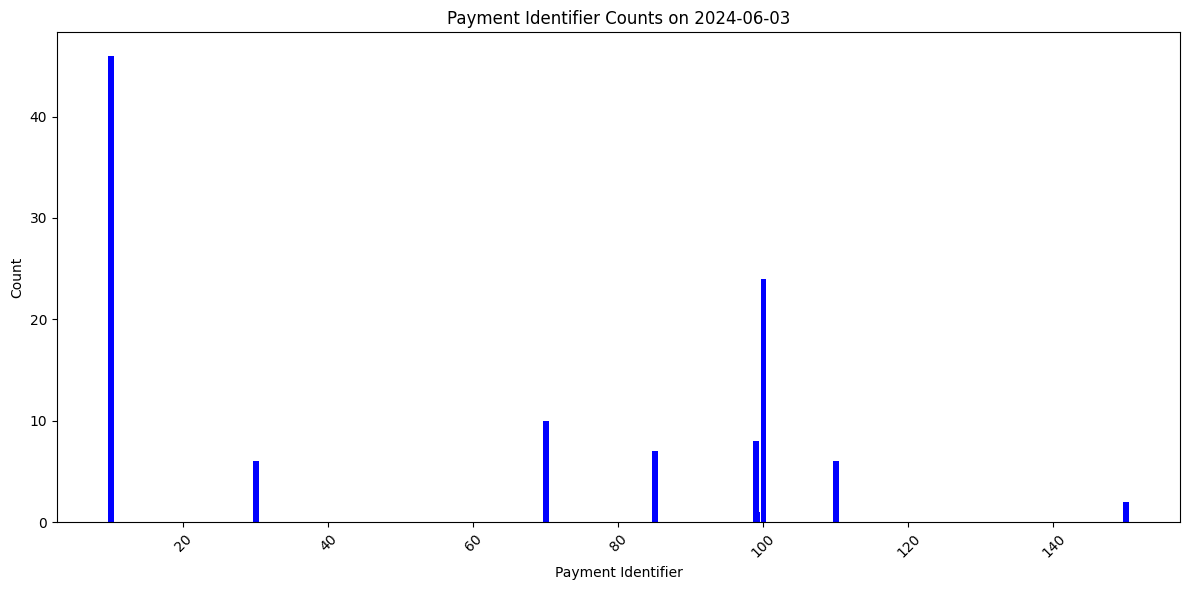

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

available_dates = df['Activation Date'].sort_values().unique()
date_mapping = {str(index): date.strftime('%Y-%m-%d') for index, date in enumerate(available_dates, start=1)}
print("Choose a date index from the following list:")
for key, value in date_mapping.items():
    print(f"{key}: {value}")

chosen_date_index = input("Enter the chosen date index: ")
if chosen_date_index not in date_mapping:
    print("Invalid date index. Exiting.")
    exit()
chosen_date = date_mapping[chosen_date_index]

filtered_data = df[df['Activation Date'] == pd.to_datetime(chosen_date)]

payment_counts = filtered_data['Initial Balance Recharge Amount Without VAT'].value_counts().reset_index()
payment_counts.columns = ['Payment Identifier', 'Count']

most_sold_payment = payment_counts.loc[payment_counts['Count'].idxmax()]

print("\nPayment Identifier Counts for chosen date:")
print(payment_counts)

print(f"\nMost Sold Payment Identifier on {chosen_date}:")
print(f"Payment Identifier: {most_sold_payment['Payment Identifier']}")
print(f"Count: {most_sold_payment['Count']}")

plt.figure(figsize=(12, 6))
plt.bar(payment_counts['Payment Identifier'], payment_counts['Count'], color='b')
plt.title(f"Payment Identifier Counts on {chosen_date}")
plt.xlabel("Payment Identifier")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Choose a Dealer City index from the following list:
1: Jeddah
2: Makkah
3: Riyadh
4: Tabuk
Enter the chosen Dealer City index: 1

Choose a Payment Identifier index from the following list:
1: 10.0
2: 20.0
3: 26.0
4: 29.99
5: 30.0
6: 43.49
7: 45.0
8: 55.0
9: 70.0
10: 85.0
11: 99.0
12: 100.0
13: 110.0
14: 150.01
15: 380.02
Enter the chosen Payment Identifier index: 12


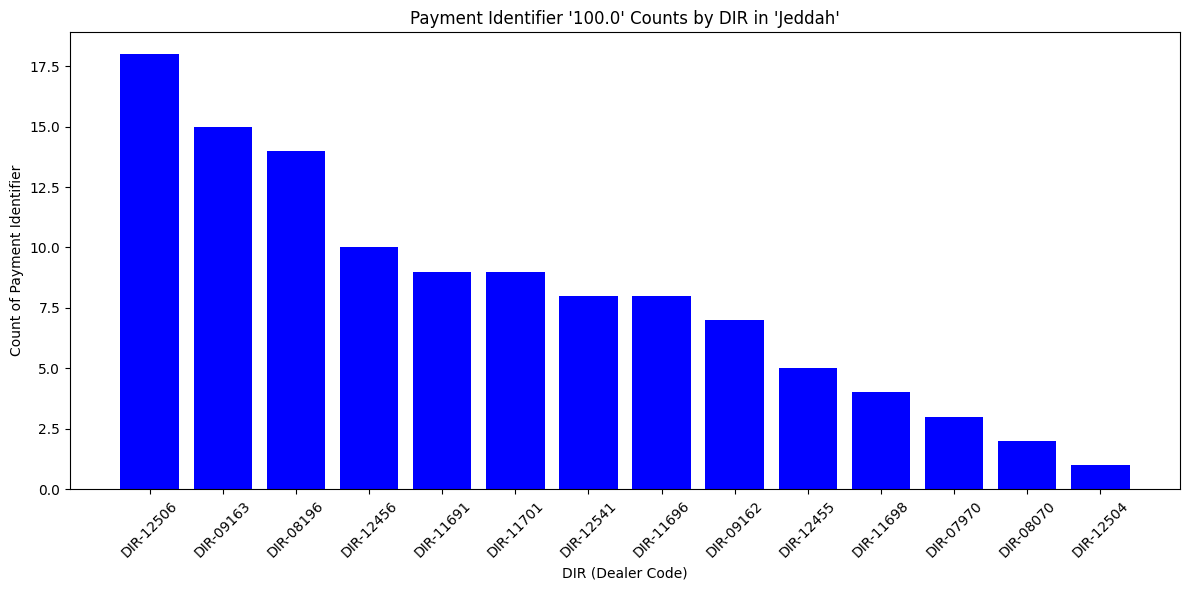

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

available_cities = df['Dealer City'].sort_values().unique()
city_mapping = {str(index): city for index, city in enumerate(available_cities, start=1)}

print("Choose a Dealer City index from the following list:")
for key, value in city_mapping.items():
    print(f"{key}: {value}")

chosen_city_index = input("Enter the chosen Dealer City index: ")
if chosen_city_index not in city_mapping:
    print("Invalid Dealer City index. Exiting.")
    exit()
chosen_city = city_mapping[chosen_city_index]

city_data = df[df['Dealer City'] == chosen_city]

available_payments = city_data['Initial Balance Recharge Amount Without VAT'].sort_values().unique()
payment_mapping = {str(index): payment for index, payment in enumerate(available_payments, start=1)}

print("\nChoose a Payment Identifier index from the following list:")
for key, value in payment_mapping.items():
    print(f"{key}: {value}")

chosen_payment_index = input("Enter the chosen Payment Identifier index: ")
if chosen_payment_index not in payment_mapping:
    print("Invalid Payment Identifier index. Exiting.")
    exit()
chosen_payment = payment_mapping[chosen_payment_index]

payment_data = city_data[city_data['Initial Balance Recharge Amount Without VAT'] == float(chosen_payment)]

dir_counts = payment_data['Dealer Code'].value_counts().reset_index()
dir_counts.columns = ['Dealer Code', 'Count']

plt.figure(figsize=(12, 6))
plt.bar(dir_counts['Dealer Code'], dir_counts['Count'].astype(int), color='b')
plt.title(f"Payment Identifier '{chosen_payment}' Counts by DIR in '{chosen_city}'")
plt.xlabel("DIR (Dealer Code)")
plt.ylabel("Count of Payment Identifier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Choose a function to execute:
1: Function 1 - Dealer Performance Analysis
2: Function 2 - Cluster Payment Analysis
3: Function 3 - Date-wise Payment Analysis
4: Function 4 - City-wise Payment Analysis
5: Function 5 - Dealer-wise Payment Analysis
6: Function 6 - Segment-wise Payment Analysis
7: Function 7 - City Payment Analysis with Details
8: Function 8 - Payment Seasonality Analysis
9: Function 9 - High-Value Payment Analysis
10: Function 10 - Cluster Payment Analysis with PyDeck
11: Exit
Enter The Function Number: 6


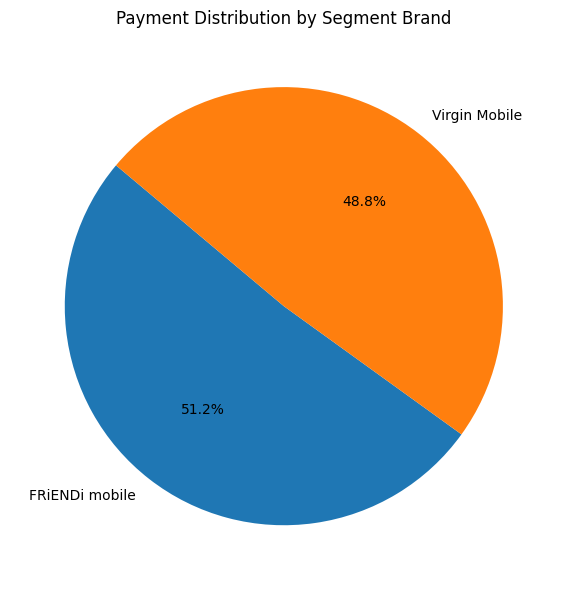

Payment distribution by segment brand chart saved as 'segment_payments_pie_chart.png'


In [34]:
import pandas as pd
import numpy as np
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

def function1():
    coords = df[['CAS Latitude', 'CAS Longitude']].values
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    dbscan = DBSCAN(eps=0.002, min_samples=5)
    df['Cluster'] = dbscan.fit_predict(coords_scaled)

    cluster_dealer_payments = {}
    for cluster_label in df['Cluster'].unique():
        if cluster_label == -1:
            continue

        cluster_data = df[df['Cluster'] == cluster_label]
        dealer_highest_payment = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().idxmax()
        highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

        cluster_dealer_payments[cluster_label] = {
            'Cluster': cluster_label,
            'Dealer Code': dealer_highest_payment,
            'Highest Payment Amount': highest_payment_amount,
            'Latitude': cluster_data['CAS Latitude'].mean(),
            'Longitude': cluster_data['CAS Longitude'].mean(),
        }

    cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
    cluster_dealer_df.columns = ['index', 'Cluster', 'Dealer Code', 'Highest Payment Amount', 'Latitude', 'Longitude']

    min_payment = cluster_dealer_df['Highest Payment Amount'].min()
    max_payment = cluster_dealer_df['Highest Payment Amount'].max()
    range_payment = max_payment - min_payment

    cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

    dealer_clusters = df.groupby('Dealer Code')['Cluster'].apply(set).reset_index()
    dealer_clusters['Cluster'] = dealer_clusters['Cluster'].apply(list)
    dealer_clusters = dealer_clusters.sort_values(by='Dealer Code')

    dealer_mapping = {str(index): dealer_code for index, dealer_code in enumerate(dealer_clusters['Dealer Code'].unique(), start=1)}

    print("Choose a dealer code identifier from the following list:")
    for key, value in dealer_mapping.items():
        print(f"{key}: {value}")
    chosen_identifier = input("Enter the chosen identifier: ")

    if chosen_identifier not in dealer_mapping:
        print("Invalid identifier. Exiting.")
        return

    chosen_dealer_code = dealer_mapping[chosen_identifier]
    chosen_clusters = dealer_clusters[dealer_clusters['Dealer Code'] == chosen_dealer_code]['Cluster'].values[0]

    filtered_cluster_dealer_df = cluster_dealer_df[cluster_dealer_df['Cluster'].isin(chosen_clusters)]

    view_state = pdk.ViewState(
        latitude=filtered_cluster_dealer_df['Latitude'].mean(),
        longitude=filtered_cluster_dealer_df['Longitude'].mean(),
        zoom=5,
        pitch=45
    )

    column_layer = pdk.Layer(
        "ColumnLayer",
        data=filtered_cluster_dealer_df,
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=500,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )

    tooltip = {
        'html': '<b>Cluster:</b> {Cluster}<br><b>Dealer Code:</b> {Dealer Code}<br><b>Highest Payment:</b> {Highest Payment Amount}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }

    r = pdk.Deck(
        layers=[column_layer],
        initial_view_state=view_state,
        tooltip=tooltip,
    )

    output_path = 'filtered_cluster_dealer_column_chart.html'
    r.to_html(output_path)

    print(f"Map for chosen dealer saved to: {output_path}")

    print(f"Available clusters for dealer {chosen_dealer_code}: {chosen_clusters}")
    chosen_cluster = int(input("Enter the chosen cluster: "))

    if chosen_cluster not in chosen_clusters:
        print("Invalid cluster. Exiting.")
        return

    cluster_data = df[df['Cluster'] == chosen_cluster]
    cluster_data['Activation Date'] = pd.to_datetime(cluster_data['Activation Date'])

    daily_payments = cluster_data.groupby('Activation Date')['Initial Balance Recharge Amount Without VAT'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(daily_payments['Activation Date'], daily_payments['Initial Balance Recharge Amount Without VAT'], marker='o', linestyle='-', color='b')
    plt.title(f"Performance in Cluster {chosen_cluster} for Dealer {chosen_dealer_code}")
    plt.xlabel("Activation Date")
    plt.ylabel("Total Initial Balance Recharge Amount Without VAT")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('cluster_performance_chart.png')
    plt.show()

    print(f"Performance chart for cluster {chosen_cluster} saved as 'cluster_performance_chart.png'")

def function2():
    coords = df[['CAS Latitude', 'CAS Longitude']].values
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    dbscan = DBSCAN(eps=0.002, min_samples=5)
    df['Cluster'] = dbscan.fit_predict(coords_scaled)

    cluster_dealer_payments = {}
    for cluster_label in df['Cluster'].unique():
        if cluster_label == -1:
            continue

        cluster_data = df[df['Cluster'] == cluster_label]
        unique_payments = cluster_data['Initial Balance Recharge Amount Without VAT'].unique()
        highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

        cluster_dealer_payments[cluster_label] = {
            'Cluster': cluster_label,
            'Unique Payments': unique_payments,
            'Highest Payment Amount': highest_payment_amount,
            'Latitude': cluster_data['CAS Latitude'].mean(),
            'Longitude': cluster_data['CAS Longitude'].mean(),
        }

    cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
    cluster_dealer_df.columns = ['index', 'Cluster', 'Unique Payments', 'Highest Payment Amount', 'Latitude', 'Longitude']

    min_payment = cluster_dealer_df['Highest Payment Amount'].min()
    max_payment = cluster_dealer_df['Highest Payment Amount'].max()
    range_payment = max_payment - min_payment

    cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

    unique_payments = df[['Initial Balance Recharge Amount Without VAT', 'Segment Brand']].drop_duplicates()
    unique_payments = unique_payments.groupby('Initial Balance Recharge Amount Without VAT')['Segment Brand'].unique().reset_index()
    unique_payments.columns = ['Payment Identifier', 'Segment Brands']

    payment_mapping = {str(index): row for index, row in unique_payments.iterrows()}

    print("Choose a unique payment identifier from the following list:")
    for key, value in payment_mapping.items():
        payment_id = value['Payment Identifier']
        segment_brands = ', '.join(value['Segment Brands'])
        print(f"{key}: {payment_id} (Segment Brands: {segment_brands})")

    chosen_identifier = input("Enter the chosen identifier: ")

    if chosen_identifier not in payment_mapping:
        print("Invalid identifier. Exiting.")
        return

    chosen_payment = payment_mapping[chosen_identifier]['Payment Identifier']

    chosen_clusters = cluster_dealer_df[cluster_dealer_df['Unique Payments'].apply(lambda x: chosen_payment in x)]['Cluster'].values
    filtered_cluster_dealer_df = cluster_dealer_df[cluster_dealer_df['Cluster'].isin(chosen_clusters)]

    view_state = pdk.ViewState(
        latitude=filtered_cluster_dealer_df['Latitude'].mean(),
        longitude=filtered_cluster_dealer_df['Longitude'].mean(),
        zoom=5,
        pitch=45
    )

    column_layer = pdk.Layer(
        "ColumnLayer",
        data=filtered_cluster_dealer_df[['Longitude', 'Latitude', 'Elevation', 'Cluster', 'Highest Payment Amount']],
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=500,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )

    tooltip = {
        'html': '<b>Cluster:</b> {Cluster}<br><b>Highest Payment:</b> {Highest Payment Amount}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }

    r = pdk.Deck(
        layers=[column_layer],
        initial_view_state=view_state,
        tooltip=tooltip,
    )

    output_path = 'filtered_cluster_dealer_column_chart.html'
    r.to_html(output_path)

    print(f"Map for chosen payment saved to: {output_path}")

    print(f"Available clusters for chosen payment {chosen_payment}: {chosen_clusters}")
    chosen_cluster = int(input("Enter the chosen cluster: "))

    if chosen_cluster not in chosen_clusters:
        print("Invalid cluster. Exiting.")
        return

    cluster_data = df[df['Cluster'] == chosen_cluster]
    cluster_data['Activation Date'] = pd.to_datetime(cluster_data['Activation Date'])

    filtered_data = cluster_data[cluster_data['Initial Balance Recharge Amount Without VAT'] == chosen_payment]

    daily_counts = filtered_data.groupby('Activation Date').size().reset_index(name='Count')

    plt.figure(figsize=(12, 6))
    plt.plot(daily_counts['Activation Date'], daily_counts['Count'], marker='o', linestyle='-', color='b')
    plt.title(f"Performance in Cluster {chosen_cluster} for Payment {chosen_payment}")
    plt.xlabel("Activation Date")
    plt.ylabel("Count of Initial Balance Recharge Amount Without VAT")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('cluster_performance_chart.png')
    plt.show()

    print(f"Performance chart for cluster {chosen_cluster} saved as 'cluster_performance_chart.png'")

def function3():
    available_dates = df['Activation Date'].sort_values().unique()
    date_mapping = {str(index): date.strftime('%Y-%m-%d') for index, date in enumerate(available_dates, start=1)}
    print("Choose a date index from the following list:")
    for key, value in date_mapping.items():
        print(f"{key}: {value}")

    chosen_date_index = input("Enter the chosen date index: ")
    if chosen_date_index not in date_mapping:
        print("Invalid date index. Exiting.")
        return
    chosen_date = date_mapping[chosen_date_index]

    filtered_data = df[df['Activation Date'] == pd.to_datetime(chosen_date)]

    payment_segment_brands = filtered_data[['Initial Balance Recharge Amount Without VAT', 'Segment Brand']].drop_duplicates()
    payment_segment_brands = payment_segment_brands.groupby('Initial Balance Recharge Amount Without VAT')['Segment Brand'].unique().reset_index()
    payment_segment_brands.columns = ['Payment Identifier', 'Segment Brands']

    payment_counts = filtered_data['Initial Balance Recharge Amount Without VAT'].value_counts().reset_index()
    payment_counts.columns = ['Payment Identifier', 'Count']

    print("\nPayment Identifier Counts for chosen date:")
    print(payment_counts)

    most_sold_payment = payment_counts.loc[payment_counts['Count'].idxmax()]

    print(f"\nMost Sold Payment Identifier on {chosen_date}:")
    print(f"Payment Identifier: {most_sold_payment['Payment Identifier']}")
    print(f"Count: {most_sold_payment['Count']}")

    plt.figure(figsize=(12, 6))
    plt.bar(payment_counts['Payment Identifier'], payment_counts['Count'], color='b')
    plt.title(f"Payment Identifier Counts on {chosen_date}")
    plt.xlabel("Payment Identifier")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def function4():
    available_cities = df['Dealer City'].sort_values().unique()
    city_mapping = {str(index): city for index, city in enumerate(available_cities, start=1)}

    print("Choose a Dealer City index from the following list:")
    for key, value in city_mapping.items():
        print(f"{key}: {value}")

    chosen_city_index = input("Enter the chosen Dealer City index: ")
    if chosen_city_index not in city_mapping:
        print("Invalid Dealer City index. Exiting.")
        return

    chosen_city = city_mapping[chosen_city_index]
    city_data = df[df['Dealer City'] == chosen_city]

    payment_segment_brands = city_data[['Initial Balance Recharge Amount Without VAT', 'Segment Brand']].drop_duplicates()
    payment_segment_brands = payment_segment_brands.groupby('Initial Balance Recharge Amount Without VAT')['Segment Brand'].unique().reset_index()
    payment_segment_brands.columns = ['Payment Identifier', 'Segment Brands']

    payment_mapping = {str(index): row for index, row in payment_segment_brands.iterrows()}

    print("\nChoose a Payment Identifier index from the following list:")
    for key, value in payment_mapping.items():
        payment_id = value['Payment Identifier']
        segment_brands = ', '.join(value['Segment Brands'])
        print(f"{key}: {payment_id} (Segment Brands: {segment_brands})")

    chosen_payment_index = input("Enter the chosen Payment Identifier index: ")
    if chosen_payment_index not in payment_mapping:
        print("Invalid Payment Identifier index. Exiting.")
        return
    chosen_payment = payment_mapping[chosen_payment_index]['Payment Identifier']

    payment_data = city_data[city_data['Initial Balance Recharge Amount Without VAT'] == float(chosen_payment)]

    dir_counts = payment_data['Dealer Code'].value_counts().reset_index()
    dir_counts.columns = ['Dealer Code', 'Count']

    plt.figure(figsize=(12, 6))
    plt.bar(dir_counts['Dealer Code'], dir_counts['Count'].astype(int), color='b')
    plt.title(f"Payment Identifier '{chosen_payment}' Counts by DIR in '{chosen_city}'")
    plt.xlabel("DIR (Dealer Code)")
    plt.ylabel("Count of Payment Identifier")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def function5():
    dealer_payments = df.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().reset_index()
    dealer_payments = dealer_payments.sort_values(by='Initial Balance Recharge Amount Without VAT', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(dealer_payments['Dealer Code'], dealer_payments['Initial Balance Recharge Amount Without VAT'], color='green')
    plt.title("Total Payments by Dealer")
    plt.xlabel("Dealer Code")
    plt.ylabel("Total Payment Amount Without VAT")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('dealer_payments_chart.png')
    plt.show()

    print(f"Total payments by dealer chart saved as 'dealer_payments_chart.png'")

def function6():
    segment_payments = df.groupby('Segment Brand')['Initial Balance Recharge Amount Without VAT'].sum().reset_index()
    segment_payments = segment_payments.sort_values(by='Initial Balance Recharge Amount Without VAT', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.pie(segment_payments['Initial Balance Recharge Amount Without VAT'], labels=segment_payments['Segment Brand'], autopct='%1.1f%%', startangle=140)
    plt.title("Payment Distribution by Segment Brand")
    plt.tight_layout()
    plt.savefig('segment_payments_pie_chart.png')
    plt.show()

    print(f"Payment distribution by segment brand chart saved as 'segment_payments_pie_chart.png'")

def function7():
    city_payments = {}
    for city in cities:
        city_payments[city] = {
            'Count': 0,
            'Total Payment': 0,
            'FRiENDi mobile Count': 0,
            'Virgin Mobile Count': 0,
            'Points': [],
            'Highest Payment': {
                'Amount': 0,
                'Latitude': None,
                'Longitude': None,
                'Segment Brand': None
            },
            'Cluster Labels': set()
        }

    for index, row in df.iterrows():
        min_distance = float('inf')
        closest_city = None
        for city, (city_lat, city_lon) in cities.items():
            distance = euclidean_distance(row['CAS Latitude'], row['CAS Longitude'], city_lat, city_lon)
            if distance < min_distance:
                min_distance = distance
                closest_city = city
        if closest_city:
            city_payments[closest_city]['Count'] += 1
            city_payments[closest_city]['Total Payment'] += row['Initial Balance Recharge Amount Without VAT']
            point_info = {
                'Initial Balance': row['Initial Balance Recharge Amount Without VAT'],
                'Segment Brand': row['Segment Brand'],
                'Latitude': row['CAS Latitude'],
                'Longitude': row['CAS Longitude']
            }
            city_payments[closest_city]['Points'].append(point_info)
            if row['Segment Brand'] == 'FRiENDi mobile':
                city_payments[closest_city]['FRiENDi mobile Count'] += 1
            elif row['Segment Brand'] == 'Virgin Mobile':
                city_payments[closest_city]['Virgin Mobile Count'] += 1
            if row['Initial Balance Recharge Amount Without VAT'] > city_payments[closest_city]['Highest Payment']['Amount']:
                city_payments[closest_city]['Highest Payment'] = {
                    'Amount': row['Initial Balance Recharge Amount Without VAT'],
                    'Latitude': row['CAS Latitude'],
                    'Longitude': row['CAS Longitude'],
                    'Segment Brand': row['Segment Brand']
                }

    for city, details in city_payments.items():
        print(f"City: {city}")
        print(f"  Total Payments: {details['Total Payment']}")
        print(f"  Number of Transactions: {details['Count']}")
        print(f"  FRiENDi mobile Count: {details['FRiENDi mobile Count']}")
        print(f"  Virgin Mobile Count: {details['Virgin Mobile Count']}")
        print(f"  Highest Payment: {details['Highest Payment']['Amount']} at (Lat: {details['Highest Payment']['Latitude']}, Lon: {details['Highest Payment']['Longitude']}) by {details['Highest Payment']['Segment Brand']}\n")

def function8():
    df['Activation Date'] = pd.to_datetime(df['Activation Date'])
    df['Day'] = df['Activation Date'].dt.day
    daily_payments = df.groupby('Day')['Initial Balance Recharge Amount Without VAT'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    plt.bar(daily_payments['Day'], daily_payments['Initial Balance Recharge Amount Without VAT'], color='orange')
    plt.title("Average Payments per Day")
    plt.xlabel("Day")
    plt.ylabel("Average Payment Amount Without VAT")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('daily_payments_chart.png')
    plt.show()

    print(f"Daily payments chart saved as 'daily_payments_chart.png'")


def function9():
    top_n = int(input("Enter the number of top high-value payments to display: "))

    high_value_payments = df.sort_values(by='Initial Balance Recharge Amount Without VAT', ascending=False).head(top_n)

    plt.figure(figsize=(12, 6))
    plt.bar(high_value_payments['Dealer Code'], high_value_payments['Initial Balance Recharge Amount Without VAT'], color='red')
    plt.title(f"Top {top_n} High-Value Payments")
    plt.xlabel("Dealer Code")
    plt.ylabel("Payment Amount Without VAT")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('high_value_payments_chart.png')
    plt.show()

    print(f"High-value payments chart saved as 'high_value_payments_chart.png'")
def function10():
    coords = df[['CAS Latitude', 'CAS Longitude']].values
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    dbscan = DBSCAN(eps=0.002, min_samples=5)
    df['Cluster'] = dbscan.fit_predict(coords_scaled)

    cluster_dealer_payments = {}

    for cluster_label in df['Cluster'].unique():
        if cluster_label == -1:
            continue

        cluster_data = df[df['Cluster'] == cluster_label]
        dealer_highest_payment = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().idxmax()
        highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

        cluster_dealer_payments[cluster_label] = {
            'Cluster': cluster_label,
            'Dealer Code': dealer_highest_payment,
            'Highest Payment Amount': highest_payment_amount,
            'Latitude': cluster_data['CAS Latitude'].mean(),
            'Longitude': cluster_data['CAS Longitude'].mean(),
        }

    cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
    cluster_dealer_df.columns = ['index', 'Cluster', 'Dealer Code', 'Highest Payment Amount', 'Latitude', 'Longitude']

    min_payment = cluster_dealer_df['Highest Payment Amount'].min()
    max_payment = cluster_dealer_df['Highest Payment Amount'].max()
    range_payment = max_payment - min_payment

    cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

    view_state = pdk.ViewState(
        latitude=24.7136,
        longitude=46.6753,
        zoom=5,
        pitch=45
    )

    column_layer = pdk.Layer(
        "ColumnLayer",
        data=cluster_dealer_df,
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=500,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )

    tooltip = {
        'html': '<b>Cluster:</b> {Cluster}<br><b>Dealer Code:</b> {Dealer Code}<br><b>Highest Payment:</b> {Highest Payment Amount}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }

    r = pdk.Deck(
        layers=[column_layer],
        initial_view_state=view_state,
        tooltip=tooltip,
    )

    output_path = 'cluster_dealer_column_chart.html'
    r.to_html(output_path)

    print(f"Map saved to: {output_path}")

def main_menu():
    print("\nChoose a function to execute:")
    print("1: Function 1 - Dealer Performance Analysis")
    print("2: Function 2 - Cluster Payment Analysis")
    print("3: Function 3 - Date-wise Payment Analysis")
    print("4: Function 4 - City-wise Payment Analysis")
    print("5: Function 5 - Dealer-wise Payment Analysis")
    print("6: Function 6 - Segment-wise Payment Analysis")
    print("7: Function 7 - City Payment Analysis with Details")
    print("8: Function 8 - Payment Seasonality Analysis")
    print("9: Function 9 - High-Value Payment Analysis")
    print("10: Function 10 - Cluster Payment Analysis with PyDeck")
    print("11: Exit")

    choice = input("Enter The Function Number: ")

    if choice == '1':
        function1()
    elif choice == '2':
        function2()
    elif choice == '3':
        function3()
    elif choice == '4':
        function4()
    elif choice == '5':
        function5()
    elif choice == '6':
        function6()
    elif choice == '7':
        function7()
    elif choice == '8':
        function8()
    elif choice == '9':
        function9()
    elif choice == '10':
        function10()
    elif choice == '11':
        print("Exiting.")
    else:
        print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main_menu()
#1,2,4

In [35]:
!pip install pydeck


Choose a function to execute:
1: Function 1 - Dealer Performance Analysis
2: Function 2 - Cluster Payment Analysis
3: Function 3 - Date-wise Payment Analysis
4: Function 4 - City-wise Payment Analysis
5: Function 5 - Cluster-wise Payment Analysis
6: Function 6 - Key Account Manager Performance Analysis
7: Function 7 - Comparative Performance Analysis
8: Function 8 - Date-wise Payment Analysis
9: Function 9 - Time-wise Payment Analysis
Other: Exit
Enter The Function Number: 1
Choose a dealer code identifier from the following list:
1: DIR-07970
2: DIR-08070
3: DIR-08196
4: DIR-08197
5: DIR-09162
6: DIR-09163
7: DIR-09165
8: DIR-09501
9: DIR-09503
10: DIR-10946
11: DIR-11173
12: DIR-11691
13: DIR-11696
14: DIR-11698
15: DIR-11701
16: DIR-12381
17: DIR-12391
18: DIR-12420
19: DIR-12455
20: DIR-12456
21: DIR-12461
22: DIR-12504
23: DIR-12506
24: DIR-12516
25: DIR-12517
26: DIR-12541
27: DIR-12579
28: DIR-12580
29: DIR-12581
30: DIR-17372
Enter the chosen identifier: 1


<IPython.core.display.Javascript object>

Map for chosen dealer saved to: filtered_cluster_dealer_column_chart.html
Available clusters for dealer DIR-07970: [4]
Enter the chosen cluster: 4


<ipython-input-36-6b256a1cde83>:120: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



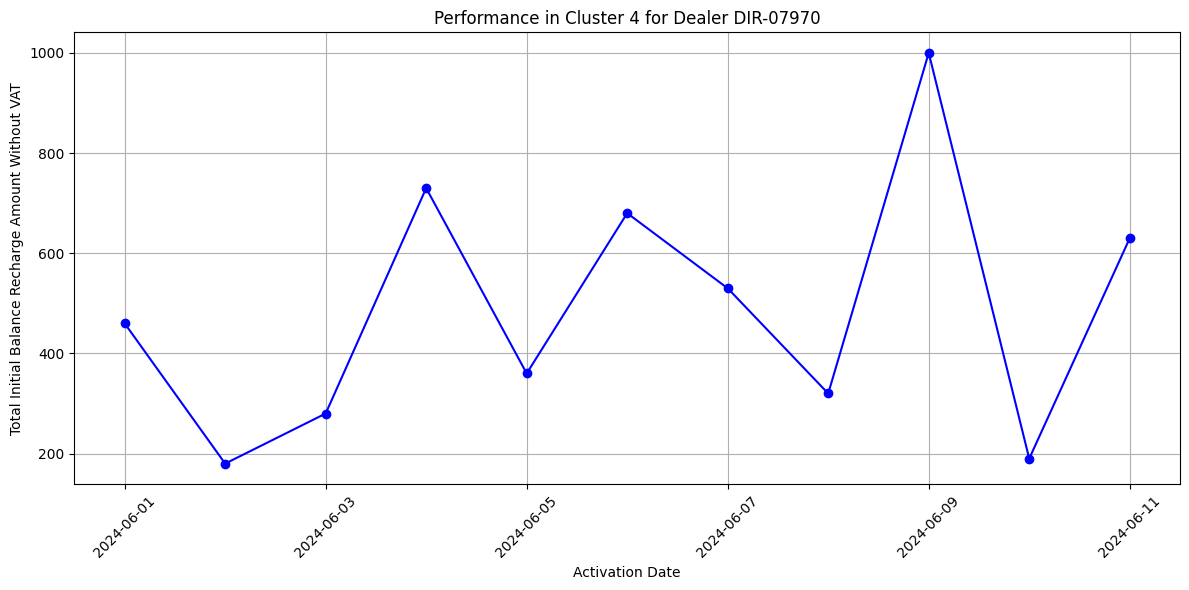

Performance chart for cluster 4 saved as 'cluster_performance_chart.png'


In [36]:
import pandas as pd
import numpy as np
import pydeck as pdk
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

excel_file_path = 'ddaattaa.xlsx'
df = pd.read_excel(excel_file_path)

cities = {
    'Riyadh': (24.7136, 46.6753),
    'Jeddah': (21.4858, 39.1925),
    'Tabuk': (28.3833, 36.5667)
}

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

def function1():
    coords = df[['CAS Latitude', 'CAS Longitude']].values
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    dbscan = DBSCAN(eps=0.002, min_samples=5)
    df['Cluster'] = dbscan.fit_predict(coords_scaled)

    cluster_dealer_payments = {}
    for cluster_label in df['Cluster'].unique():
        if cluster_label == -1:
            continue

        cluster_data = df[df['Cluster'] == cluster_label]
        dealer_highest_payment = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().idxmax()
        highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

        cluster_dealer_payments[cluster_label] = {
            'Cluster': cluster_label,
            'Dealer Code': dealer_highest_payment,
            'Highest Payment Amount': highest_payment_amount,
            'Latitude': cluster_data['CAS Latitude'].mean(),
            'Longitude': cluster_data['CAS Longitude'].mean(),
        }

    cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
    cluster_dealer_df.columns = ['index', 'Cluster', 'Dealer Code', 'Highest Payment Amount', 'Latitude', 'Longitude']

    min_payment = cluster_dealer_df['Highest Payment Amount'].min()
    max_payment = cluster_dealer_df['Highest Payment Amount'].max()
    range_payment = max_payment - min_payment

    cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

    dealer_clusters = df.groupby('Dealer Code')['Cluster'].apply(set).reset_index()
    dealer_clusters['Cluster'] = dealer_clusters['Cluster'].apply(list)
    dealer_clusters = dealer_clusters.sort_values(by='Dealer Code')

    dealer_mapping = {str(index): dealer_code for index, dealer_code in enumerate(dealer_clusters['Dealer Code'].unique(), start=1)}

    print("Choose a dealer code identifier from the following list:")
    for key, value in dealer_mapping.items():
        print(f"{key}: {value}")
    chosen_identifier = input("Enter the chosen identifier: ")

    if chosen_identifier not in dealer_mapping:
        print("Invalid identifier. Exiting.")
        return

    chosen_dealer_code = dealer_mapping[chosen_identifier]
    chosen_clusters = dealer_clusters[dealer_clusters['Dealer Code'] == chosen_dealer_code]['Cluster'].values[0]

    filtered_cluster_dealer_df = cluster_dealer_df[cluster_dealer_df['Cluster'].isin(chosen_clusters)]

    view_state = pdk.ViewState(
        latitude=filtered_cluster_dealer_df['Latitude'].mean(),
        longitude=filtered_cluster_dealer_df['Longitude'].mean(),
        zoom=5,
        pitch=45
    )

    column_layer = pdk.Layer(
        "ColumnLayer",
        data=filtered_cluster_dealer_df,
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=500,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )

    tooltip = {
        'html': '<b>Cluster:</b> {Cluster}<br><b>Dealer Code:</b> {Dealer Code}<br><b>Highest Payment:</b> {Highest Payment Amount}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }

    r = pdk.Deck(
        layers=[column_layer],
        initial_view_state=view_state,
        tooltip=tooltip,
    )

    output_path = 'filtered_cluster_dealer_column_chart.html'
    r.to_html(output_path)

    print(f"Map for chosen dealer saved to: {output_path}")

    print(f"Available clusters for dealer {chosen_dealer_code}: {chosen_clusters}")
    chosen_cluster = int(input("Enter the chosen cluster: "))

    if chosen_cluster not in chosen_clusters:
        print("Invalid cluster. Exiting.")
        return

    cluster_data = df[df['Cluster'] == chosen_cluster]
    cluster_data['Activation Date'] = pd.to_datetime(cluster_data['Activation Date'])

    daily_payments = cluster_data.groupby('Activation Date')['Initial Balance Recharge Amount Without VAT'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(daily_payments['Activation Date'], daily_payments['Initial Balance Recharge Amount Without VAT'], marker='o', linestyle='-', color='b')
    plt.title(f"Performance in Cluster {chosen_cluster} for Dealer {chosen_dealer_code}")
    plt.xlabel("Activation Date")
    plt.ylabel("Total Initial Balance Recharge Amount Without VAT")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('cluster_performance_chart.png')
    plt.show()

    print(f"Performance chart for cluster {chosen_cluster} saved as 'cluster_performance_chart.png'")

def function2():
    coords = df[['CAS Latitude', 'CAS Longitude']].values
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    dbscan = DBSCAN(eps=0.002, min_samples=5)
    df['Cluster'] = dbscan.fit_predict(coords_scaled)

    cluster_dealer_payments = {}
    for cluster_label in df['Cluster'].unique():
        if cluster_label == -1:
            continue

        cluster_data = df[df['Cluster'] == cluster_label]
        unique_payments = cluster_data['Initial Balance Recharge Amount Without VAT'].unique()
        highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

        cluster_dealer_payments[cluster_label] = {
            'Cluster': cluster_label,
            'Unique Payments': unique_payments,
            'Highest Payment Amount': highest_payment_amount,
            'Latitude': cluster_data['CAS Latitude'].mean(),
            'Longitude': cluster_data['CAS Longitude'].mean(),
        }

    cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
    cluster_dealer_df.columns = ['index', 'Cluster', 'Unique Payments', 'Highest Payment Amount', 'Latitude', 'Longitude']

    min_payment = cluster_dealer_df['Highest Payment Amount'].min()
    max_payment = cluster_dealer_df['Highest Payment Amount'].max()
    range_payment = max_payment - min_payment

    cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

    unique_payments = df[['Initial Balance Recharge Amount Without VAT', 'Segment Brand']].drop_duplicates()
    unique_payments = unique_payments.groupby('Initial Balance Recharge Amount Without VAT')['Segment Brand'].unique().reset_index()
    unique_payments.columns = ['Payment Identifier', 'Segment Brands']

    payment_mapping = {str(index): row for index, row in unique_payments.iterrows()}

    print("Choose a unique payment identifier from the following list:")
    for key, value in payment_mapping.items():
        payment_id = value['Payment Identifier']
        segment_brands = ', '.join(value['Segment Brands'])
        print(f"{key}: {payment_id} (Segment Brands: {segment_brands})")

    chosen_identifier = input("Enter the chosen identifier: ")

    if chosen_identifier not in payment_mapping:
        print("Invalid identifier. Exiting.")
        return

    chosen_payment = payment_mapping[chosen_identifier]['Payment Identifier']

    chosen_clusters = cluster_dealer_df[cluster_dealer_df['Unique Payments'].apply(lambda x: chosen_payment in x)]['Cluster'].values
    filtered_cluster_dealer_df = cluster_dealer_df[cluster_dealer_df['Cluster'].isin(chosen_clusters)]

    view_state = pdk.ViewState(
        latitude=filtered_cluster_dealer_df['Latitude'].mean(),
        longitude=filtered_cluster_dealer_df['Longitude'].mean(),
        zoom=5,
        pitch=45
    )

    column_layer = pdk.Layer(
        "ColumnLayer",
        data=filtered_cluster_dealer_df[['Longitude', 'Latitude', 'Elevation', 'Cluster', 'Highest Payment Amount']],
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=500,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )

    tooltip = {
        'html': '<b>Cluster:</b> {Cluster}<br><b>Highest Payment:</b> {Highest Payment Amount}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }

    r = pdk.Deck(
        layers=[column_layer],
        initial_view_state=view_state,
        tooltip=tooltip,
    )

    output_path = 'filtered_cluster_dealer_column_chart.html'
    r.to_html(output_path)

    print(f"Map for chosen payment saved to: {output_path}")

    print(f"Available clusters for chosen payment {chosen_payment}: {chosen_clusters}")
    chosen_cluster = int(input("Enter the chosen cluster: "))

    if chosen_cluster not in chosen_clusters:
        print("Invalid cluster. Exiting.")
        return

    cluster_data = df[df['Cluster'] == chosen_cluster]
    cluster_data['Activation Date'] = pd.to_datetime(cluster_data['Activation Date'])

    filtered_data = cluster_data[cluster_data['Initial Balance Recharge Amount Without VAT'] == chosen_payment]

    daily_counts = filtered_data.groupby('Activation Date').size().reset_index(name='Count')

    plt.figure(figsize=(12, 6))
    plt.plot(daily_counts['Activation Date'], daily_counts['Count'], marker='o', linestyle='-', color='b')
    plt.title(f"Performance in Cluster {chosen_cluster} for Payment {chosen_payment}")
    plt.xlabel("Activation Date")
    plt.ylabel("Count of Initial Balance Recharge Amount Without VAT")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('cluster_performance_chart.png')
    plt.show()

    print(f"Performance chart for cluster {chosen_cluster} saved as 'cluster_performance_chart.png'")

def function3():
    available_dates = df['Activation Date'].sort_values().unique()
    date_mapping = {str(index): date.strftime('%Y-%m-%d') for index, date in enumerate(available_dates, start=1)}
    print("Choose a date index from the following list:")
    for key, value in date_mapping.items():
        print(f"{key}: {value}")

    chosen_date_index = input("Enter the chosen date index: ")
    if chosen_date_index not in date_mapping:
        print("Invalid date index. Exiting.")
        return
    chosen_date = date_mapping[chosen_date_index]

    filtered_data = df[df['Activation Date'] == pd.to_datetime(chosen_date)]

    payment_segment_brands = filtered_data[['Initial Balance Recharge Amount Without VAT', 'Segment Brand']].drop_duplicates()
    payment_segment_brands = payment_segment_brands.groupby('Initial Balance Recharge Amount Without VAT')['Segment Brand'].unique().reset_index()
    payment_segment_brands.columns = ['Payment Identifier', 'Segment Brands']

    payment_counts = filtered_data['Initial Balance Recharge Amount Without VAT'].value_counts().reset_index()
    payment_counts.columns = ['Payment Identifier', 'Count']

    print("\nPayment Identifier Counts for chosen date:")
    print(payment_counts)

    most_sold_payment = payment_counts.loc[payment_counts['Count'].idxmax()]

    print(f"\nMost Sold Payment Identifier on {chosen_date}:")
    print(f"Payment Identifier: {most_sold_payment['Payment Identifier']}")
    print(f"Count: {most_sold_payment['Count']}")

    plt.figure(figsize=(12, 6))
    plt.bar(payment_counts['Payment Identifier'], payment_counts['Count'], color='b')
    plt.title(f"Payment Identifier Counts on {chosen_date}")
    plt.xlabel("Payment Identifier")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def function4():
    available_cities = df['Dealer City'].sort_values().unique()
    city_mapping = {str(index): city for index, city in enumerate(available_cities, start=1)}

    print("Choose a Dealer City index from the following list:")
    for key, value in city_mapping.items():
        print(f"{key}: {value}")

    chosen_city_index = input("Enter the chosen Dealer City index: ")
    if chosen_city_index not in city_mapping:
        print("Invalid Dealer City index. Exiting.")
        return

    chosen_city = city_mapping[chosen_city_index]
    city_data = df[df['Dealer City'] == chosen_city]

    payment_segment_brands = city_data[['Initial Balance Recharge Amount Without VAT', 'Segment Brand']].drop_duplicates()
    payment_segment_brands = payment_segment_brands.groupby('Initial Balance Recharge Amount Without VAT')['Segment Brand'].unique().reset_index()
    payment_segment_brands.columns = ['Payment Identifier', 'Segment Brands']

    payment_mapping = {str(index): row for index, row in payment_segment_brands.iterrows()}

    print("\nChoose a Payment Identifier index from the following list:")
    for key, value in payment_mapping.items():
        payment_id = value['Payment Identifier']
        segment_brands = ', '.join(value['Segment Brands'])
        print(f"{key}: {payment_id} (Segment Brands: {segment_brands})")

    chosen_payment_index = input("Enter the chosen Payment Identifier index: ")
    if chosen_payment_index not in payment_mapping:
        print("Invalid Payment Identifier index. Exiting.")
        return
    chosen_payment = payment_mapping[chosen_payment_index]['Payment Identifier']

    payment_data = city_data[city_data['Initial Balance Recharge Amount Without VAT'] == float(chosen_payment)]

    dir_counts = payment_data['Dealer Code'].value_counts().reset_index()
    dir_counts.columns = ['Dealer Code', 'Count']

    plt.figure(figsize=(12, 6))
    plt.bar(dir_counts['Dealer Code'], dir_counts['Count'].astype(int), color='b')
    plt.title(f"Payment Identifier '{chosen_payment}' Counts by DIR in '{chosen_city}'")
    plt.xlabel("DIR (Dealer Code)")
    plt.ylabel("Count of Payment Identifier")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def function5():
    coords = df[['CAS Latitude', 'CAS Longitude']].values
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    dbscan = DBSCAN(eps=0.002, min_samples=5)
    df['Cluster'] = dbscan.fit_predict(coords_scaled)

    cluster_dealer_payments = {}

    for cluster_label in df['Cluster'].unique():
        if cluster_label == -1:
            continue

        cluster_data = df[df['Cluster'] == cluster_label]
        dealer_highest_payment = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().idxmax()
        highest_payment_amount = cluster_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().max()

        cluster_dealer_payments[cluster_label] = {
            'Cluster': cluster_label,
            'Dealer Code': dealer_highest_payment,
            'Highest Payment Amount': highest_payment_amount,
            'Latitude': cluster_data['CAS Latitude'].mean(),
            'Longitude': cluster_data['CAS Longitude'].mean(),
        }

    cluster_dealer_df = pd.DataFrame.from_dict(cluster_dealer_payments, orient='index').reset_index()
    cluster_dealer_df.columns = ['index', 'Cluster', 'Dealer Code', 'Highest Payment Amount', 'Latitude', 'Longitude']

    min_payment = cluster_dealer_df['Highest Payment Amount'].min()
    max_payment = cluster_dealer_df['Highest Payment Amount'].max()
    range_payment = max_payment - min_payment

    cluster_dealer_df['Elevation'] = (cluster_dealer_df['Highest Payment Amount'] - min_payment) / range_payment * 100

    view_state = pdk.ViewState(
        latitude=24.7136,
        longitude=46.6753,
        zoom=5,
        pitch=45
    )

    column_layer = pdk.Layer(
        "ColumnLayer",
        data=cluster_dealer_df,
        get_position=["Longitude", "Latitude"],
        get_elevation="Elevation",
        elevation_scale=50,
        radius=500,
        get_fill_color=[255, 0, 0, 180],
        pickable=True,
        auto_highlight=True,
    )

    tooltip = {
        'html': '<b>Cluster:</b> {Cluster}<br><b>Dealer Code:</b> {Dealer Code}<br><b>Highest Payment:</b> {Highest Payment Amount}',
        'style': {
            'backgroundColor': 'steelblue',
            'color': 'white'
        }
    }

    r = pdk.Deck(
        layers=[column_layer],
        initial_view_state=view_state,
        tooltip=tooltip,
    )

    output_path = 'cluster_dealer_column_chart.html'
    r.to_html(output_path)

    print(f"Map saved to: {output_path}")

def function6():
    available_kam = df['Key Account Manager'].sort_values().unique()
    kam_mapping = {str(index): kam for index, kam in enumerate(available_kam, start=1)}

    print("Choose a Key Account Manager index from the following list:")
    for key, value in kam_mapping.items():
        print(f"{key}: {value}")

    chosen_kam_index = input("Enter the chosen Key Account Manager index: ")
    if chosen_kam_index not in kam_mapping:
        print("Invalid Key Account Manager index. Exiting.")
        return

    chosen_kam = kam_mapping[chosen_kam_index]
    kam_data = df[df['Key Account Manager'] == chosen_kam]

    available_dirs = kam_data['Dealer Code'].sort_values().unique()
    dir_mapping = {str(index): dir for index, dir in enumerate(available_dirs, start=1)}

    print(f"Directories under Key Account Manager '{chosen_kam}':")
    for key, value in dir_mapping.items():
        print(f"{key}: {value}")

    dir_performance = kam_data.groupby('Dealer Code')['Initial Balance Recharge Amount Without VAT'].sum().reset_index()

    average_performance = dir_performance['Initial Balance Recharge Amount Without VAT'].mean()

    plt.figure(figsize=(12, 6))
    plt.bar(dir_performance['Dealer Code'], dir_performance['Initial Balance Recharge Amount Without VAT'], color='b')
    plt.axhline(y=average_performance, color='r', linestyle='--', label='Average Performance')
    plt.title(f"Performance of DIRs under Key Account Manager '{chosen_kam}'")
    plt.xlabel("DIR")
    plt.ylabel("Total Payment Amount Without VAT")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('kam_dir_performance_chart.png')
    plt.show()

    print(f"Performance chart of DIRs under Key Account Manager '{chosen_kam}' saved as 'kam_dir_performance_chart.png'")
    print(f"Average performance of DIRs: {average_performance}")

def function7():
    choice = input("Do you want to compare between cities or dealers? (Enter 'cities' or 'dealers'): ").strip().lower()

    if choice == 'cities':
        entities = df['Dealer City'].unique()
        entity_label = 'City'
    elif choice == 'dealers':
        entities = df['Dealer Code'].unique()
        entity_label = 'Dealer Code'
    else:
        print("Invalid choice. Exiting.")
        return

    entity_mapping = {str(index): entity for index, entity in enumerate(entities, start=1)}

    print(f"Choose two {entity_label} identifiers from the following list for comparison:")
    for key, value in entity_mapping.items():
        print(f"{key}: {value}")

    chosen_identifiers = input(f"Enter the two chosen {entity_label} identifiers (comma-separated): ").split(',')

    # Display the list of identifiers to choose from after input
    print("You have selected the following identifiers:")
    for identifier in chosen_identifiers:
        if identifier in entity_mapping:
            print(f"{identifier}: {entity_mapping[identifier]}")
        else:
            print(f"{identifier}: Invalid identifier")

    if len(chosen_identifiers) != 2 or any(identifier not in entity_mapping for identifier in chosen_identifiers):
        print("Invalid identifiers. Exiting.")
        return

    entity1, entity2 = entity_mapping[chosen_identifiers[0]], entity_mapping[chosen_identifiers[1]]
    if choice == 'cities':
        entity1_data = df[df['Dealer City'] == entity1]
        entity2_data = df[df['Dealer City'] == entity2]
    else:
        entity1_data = df[df['Dealer Code'] == entity1]
        entity2_data = df[df['Dealer Code'] == entity2]

    entity1_summary = entity1_data.groupby('Activation Date')['Initial Balance Recharge Amount Without VAT'].sum().reset_index()
    entity2_summary = entity2_data.groupby('Activation Date')['Initial Balance Recharge Amount Without VAT'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(entity1_summary['Activation Date'], entity1_summary['Initial Balance Recharge Amount Without VAT'], marker='o', linestyle='-', color='b', label=entity1)
    plt.plot(entity2_summary['Activation Date'], entity2_summary['Initial Balance Recharge Amount Without VAT'], marker='o', linestyle='-', color='r', label=entity2)

    plt.xlabel('Activation Date')
    plt.ylabel('Total Initial Balance Recharge Amount Without VAT')
    plt.title(f'Comparative Performance Analysis: {entity1} vs {entity2}')
    plt.legend()
    plt.grid(True)
    plt.show()


def function8():
    df['Activation Date'] = pd.to_datetime(df['Activation Date'])

    available_dates = df['Activation Date'].sort_values().unique()
    date_mapping = {str(index): date.strftime('%Y-%m-%d') for index, date in enumerate(available_dates, start=1)}

    print("Choose a date index from the following list:")
    for key, value in date_mapping.items():
        print(f"{key}: {value}")

    chosen_date_index = input("Enter the chosen date index: ")
    if chosen_date_index not in date_mapping:
        print("Invalid date index. Exiting.")
        return
    chosen_date = date_mapping[chosen_date_index]

    filtered_data = df[df['Activation Date'] == pd.to_datetime(chosen_date)]

    filtered_data['Activation Hour'] = pd.to_datetime(filtered_data['Activation Time'], format='%H:%M:%S').dt.hour

    payment_counts = filtered_data['Initial Balance Recharge Amount Without VAT'].value_counts().reset_index()
    payment_counts.columns = ['Payment Identifier', 'Count']

    plt.figure(figsize=(12, 6))
    plt.bar(payment_counts['Payment Identifier'], payment_counts['Count'], color='b')
    plt.title(f"Payment Identifier Counts on {chosen_date}")
    plt.xlabel("Payment Identifier")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    hourly_counts = filtered_data.groupby('Activation Hour')['Initial Balance Recharge Amount Without VAT'].count().reset_index()
    hourly_counts.columns = ['Activation Hour', 'Count']

    plt.figure(figsize=(12, 6))
    plt.plot(hourly_counts['Activation Hour'], hourly_counts['Count'], marker='o', linestyle='-')
    plt.title(f"Hourly Payment Counts on {chosen_date}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Count")
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def function9():
    df['Activation Time'] = pd.to_datetime(df['Activation Time'], format='%H:%M:%S')

    df['Activation Hour'] = df['Activation Time'].dt.hour

    unique_dates = sorted(df['Activation Date'].unique())
    print("Available dates:")
    for i, date in enumerate(unique_dates):
        print(f"{i + 1}: {date}")

    date_selection = int(input("Enter the number corresponding to the date: ")) - 1
    if date_selection < 0 or date_selection >= len(unique_dates):
        print("Invalid selection. Please select from the available options.")
        return

    selected_date = unique_dates[date_selection]
    print(f"Selected date: {selected_date}")

    unique_brands = sorted(df['Segment Brand'].unique())
    print("Available segment brands:")
    for i, brand in enumerate(unique_brands):
        print(f"{i + 1}: {brand}")

    brand_selection = int(input("Enter the number corresponding to the segment brand: ")) - 1
    if brand_selection < 0 or brand_selection >= len(unique_brands):
        print("Invalid selection. Please select from the available options.")
        return

    selected_brand = unique_brands[brand_selection]
    print(f"Selected segment brand: {selected_brand}")

    filtered_df = df[(df['Activation Date'] == selected_date) & (df['Segment Brand'] == selected_brand)]

    if filtered_df.empty:
        print("No data found for the specified date and segment brand.")
        return

    unique_hours = sorted(filtered_df['Activation Hour'].unique())
    print("Available hours:")
    for i, hour in enumerate(unique_hours):
        print(f"{i + 1}: {hour}:00")

    hour_selection = int(input("Enter the number corresponding to the hour of the day: ")) - 1
    if hour_selection < 0 or hour_selection >= len(unique_hours):
        print("Invalid selection. Please select from the available options.")
        return

    selected_hour = unique_hours[hour_selection]
    print(f"Selected hour: {selected_hour}:00")

    hour_filtered_df = filtered_df[filtered_df['Activation Hour'] == selected_hour]

    hour_filtered_df['Time'] = hour_filtered_df['Activation Time'].dt.strftime('%H:%M')
    aggregated_df = hour_filtered_df.groupby('Time').size().reset_index(name='Count')

    plt.figure(figsize=(12, 6))
    plt.plot(aggregated_df['Time'], aggregated_df['Count'], marker='o')
    plt.xticks(rotation=45)
    plt.xlabel('Time of Day')
    plt.ylabel('Count')
    plt.title(f'Count of Activations for {selected_brand} on {selected_date} at {selected_hour}:00')
    plt.grid(True)
    plt.tight_layout()

    output_path = f'activation_count_{selected_brand}_{selected_date}_{selected_hour}.png'
    plt.savefig(output_path)
    plt.show()

    print(f"Line chart saved to: {output_path}")


def main_menu():
    print("\nChoose a function to execute:")
    print("1: Function 1 - Dealer Performance Analysis")
    print("2: Function 2 - Cluster Payment Analysis")
    print("3: Function 3 - Date-wise Payment Analysis")
    print("4: Function 4 - City-wise Payment Analysis")
    print("5: Function 5 - Cluster-wise Payment Analysis")
    print("6: Function 6 - Key Account Manager Performance Analysis")
    print("7: Function 7 - Comparative Performance Analysis")
    print("8: Function 8 - Date-wise Payment Analysis")
    print("9: Function 9 - Time-wise Payment Analysis")
    print("Other: Exit")

    choice = input("Enter The Function Number: ")

    if choice == '1':
        function1()
    elif choice == '2':
        function2()
    elif choice == '3':
        function3()
    elif choice == '4':
        function4()
    elif choice == '5':
        function5()
    elif choice == '6':
        function6()
    elif choice == '7':
        function7()
    elif choice == '8':
        function8()
    elif choice == '9':
        function9()
    else:
        print("Exiting.")

if __name__ == "__main__":
    main_menu()
# Sunday 21/7

Correlation: 0.20787528336883052


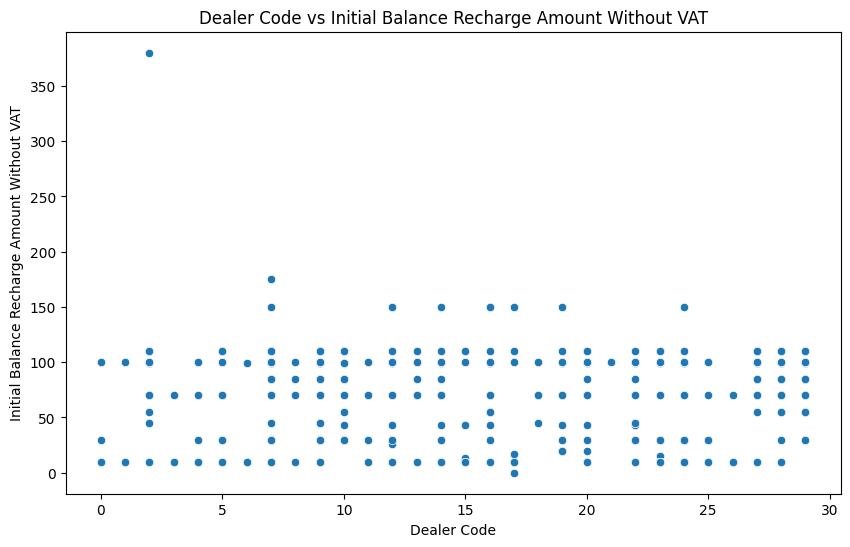

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'ddaattaa.xlsx'
df = pd.read_excel(file_path)

df['Dealer_Code'] = df['Dealer Code'].astype('category').cat.codes

correlation = df[['Dealer_Code', 'Initial Balance Recharge Amount Without VAT']].corr().iloc[0, 1]
print(f'Correlation: {correlation}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dealer_Code', y='Initial Balance Recharge Amount Without VAT', data=df)
plt.title('Dealer Code vs Initial Balance Recharge Amount Without VAT')
plt.xlabel('Dealer Code')
plt.ylabel('Initial Balance Recharge Amount Without VAT')
plt.show()

In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = 'ddaattaa.xlsx'
df = pd.read_excel(file_path)

label_encoder = LabelEncoder()
df['Dealer Code_encoded'] = label_encoder.fit_transform(df['Dealer Code'])

correlation = df['Dealer Code_encoded'].corr(df['Initial Balance Recharge Amount Without VAT'])
print(f"Correlation between 'Dealer Code' and 'Initial Balance Recharge Amount Without VAT': {correlation}")

Correlation between 'Dealer Code' and 'Initial Balance Recharge Amount Without VAT': 0.20787528336883093


In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = 'ddaattaa.xlsx'
df = pd.read_excel(file_path)

label_encoder = LabelEncoder()
df['Segment Brand_encoded'] = label_encoder.fit_transform(df['Segment Brand'])

correlation = df['Segment Brand_encoded'].corr(df['Initial Balance Recharge Amount Without VAT'])
print(f"Correlation between 'Segment Brand' and 'Initial Balance Recharge Amount Without VAT': {correlation}")

Correlation between 'Segment Brand' and 'Initial Balance Recharge Amount Without VAT': 0.6576147511445981


In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = 'ddaattaa.xlsx'
df = pd.read_excel(file_path)

label_encoder = LabelEncoder()
df['Nationality_encoded'] = label_encoder.fit_transform(df['Nationality'])

correlation = df['Nationality_encoded'].corr(df['Initial Balance Recharge Amount Without VAT'])
print(f"Correlation between 'Nationality' and 'Initial Balance Recharge Amount Without VAT': {correlation}")

Correlation between 'Nationality' and 'Initial Balance Recharge Amount Without VAT': -0.20321571935401375


In [41]:
import pandas as pd

file_path = 'ddaattaa.xlsx'
df = pd.read_excel(file_path)

df['Activation Date_numeric'] = pd.to_datetime(df['Activation Date']).map(pd.Timestamp.timestamp)

correlation = df['Activation Date_numeric'].corr(df['Initial Balance Recharge Amount Without VAT'])
print(f"Correlation between 'Activation Date' and 'Initial Balance Recharge Amount Without VAT': {correlation}")

Correlation between 'Activation Date' and 'Initial Balance Recharge Amount Without VAT': -0.08091755007233038


In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = 'ddaattaa.xlsx'
df = pd.read_excel(file_path)

label_encoder = LabelEncoder()
df['Dealer City_encoded'] = label_encoder.fit_transform(df['Dealer City'])

correlation = df['Dealer City_encoded'].corr(df['Initial Balance Recharge Amount Without VAT'])
print(f"Correlation between 'Dealer City' and 'Initial Balance Recharge Amount Without VAT': {correlation}")

Correlation between 'Dealer City' and 'Initial Balance Recharge Amount Without VAT': 0.2632474306911505


In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = 'ddaattaa.xlsx'
df = pd.read_excel(file_path)

def encode_column(column):
    if column.dtype == 'object':
        label_encoder = LabelEncoder()
        return pd.Series(label_encoder.fit_transform(column))
    elif column.dtype == 'datetime64[ns]':
        return pd.Series(column.apply(lambda x: x.timestamp()))
    else:
        return column

def calculate_correlation(df, col1, col2):
    col1_data = encode_column(df[col1])
    col2_data = encode_column(df[col2])
    correlation = col1_data.corr(col2_data)
    return correlation

columns_to_correlate = [
    'Dealer Code', 'Segment Brand', 'Nationality', 'Activation Date', 'Dealer City',
    'Distributor Name', 'Dealer Channel', 'Account Manager', 'Dealer Name',
    'Area Manager', 'Key Account Manager', 'Team Leader', 'Customer SubType',
    'Sales Champion', 'Segment', 'Customer ID Type', 'Dealer Partner Name'
]

correlations = {}
for col in columns_to_correlate:
    try:
        correlation = calculate_correlation(df, col, 'Initial Balance Recharge Amount Without VAT')
        correlations[col] = correlation
    except KeyError as e:
        print(f"Column not found: {e}")
    except Exception as e:
        print(f"Error calculating correlation between '{col}' and 'Initial Balance Recharge Amount Without VAT': {e}")

positive_correlations = {col: corr for col, corr in correlations.items() if corr > 0}
negative_correlations = {col: corr for col, corr in correlations.items() if corr < 0}

print("Positive correlations ranked from strongest to weakest:")
sorted_positive = sorted(positive_correlations.items(), key=lambda x: x[1], reverse=True)
for col, corr in sorted_positive:
    print(f"Correlation between '{col}' and 'Initial Balance Recharge Amount Without VAT': {corr:.4f}")

print("\nNegative correlations ranked from strongest to weakest:")
sorted_negative = sorted(negative_correlations.items(), key=lambda x: x[1])
for col, corr in sorted_negative:
    print(f"Correlation between '{col}' and 'Initial Balance Recharge Amount Without VAT': {corr:.4f}")


Positive correlations ranked from strongest to weakest:
Correlation between 'Segment Brand' and 'Initial Balance Recharge Amount Without VAT': 0.6576
Correlation between 'Segment' and 'Initial Balance Recharge Amount Without VAT': 0.6562
Correlation between 'Customer SubType' and 'Initial Balance Recharge Amount Without VAT': 0.6468
Correlation between 'Key Account Manager' and 'Initial Balance Recharge Amount Without VAT': 0.2824
Correlation between 'Dealer City' and 'Initial Balance Recharge Amount Without VAT': 0.2632
Correlation between 'Dealer Code' and 'Initial Balance Recharge Amount Without VAT': 0.2079
Correlation between 'Area Manager' and 'Initial Balance Recharge Amount Without VAT': 0.1898
Correlation between 'Dealer Channel' and 'Initial Balance Recharge Amount Without VAT': 0.1894
Correlation between 'Dealer Name' and 'Initial Balance Recharge Amount Without VAT': 0.1894
Correlation between 'Distributor Name' and 'Initial Balance Recharge Amount Without VAT': 0.0985
Corr

In [44]:
import pandas as pd
from scipy import stats

file_path = 'ddaattaa.xlsx'
df = pd.read_excel(file_path)

def encode_column(column):
    if column.dtype == 'object':
        label_encoder = LabelEncoder()
        return pd.Series(label_encoder.fit_transform(column))
    elif column.dtype == 'datetime64[ns]':
        return pd.Series(column.apply(lambda x: x.timestamp()))
    else:
        return column

def is_categorical(column):
    return column.dtype == 'object' or column.dtype.name == 'category'

def calculate_anova_eta_squared(df, cat_col, num_col):
    if is_categorical(df[cat_col]) and pd.api.types.is_numeric_dtype(df[num_col]):
        groups = [df[num_col][df[cat_col] == cat] for cat in df[cat_col].unique()]
        if len(groups) > 1:
            f_val, p_val = stats.f_oneway(*groups)


            overall_mean = df[num_col].mean()
            ssb = sum([(group.mean() - overall_mean) ** 2 * len(group) for group in groups])


            sst = sum((df[num_col] - overall_mean) ** 2)


            eta_squared = ssb / sst

            return f_val, p_val, eta_squared
        else:
            return None, "Not enough groups for ANOVA", None
    else:
        raise ValueError("Invalid column types for ANOVA")

cat_col = 'Dealer Code'
num_col = 'Initial Balance Recharge Amount Without VAT'

try:
    f_val, p_val, eta_squared = calculate_anova_eta_squared(df, cat_col, num_col)
    if f_val is not None:
        print(f"ANOVA F-value for '{cat_col}' and '{num_col}': {f_val:.4f}")
        print(f"ANOVA p-value for '{cat_col}' and '{num_col}': {p_val:.4f}")
        print(f"Eta-squared for '{cat_col}' and '{num_col}': {eta_squared:.4f}")
    else:
        print(f"ANOVA could not be performed: {p_val}")
except KeyError as e:
    print(f"Column not found: {e}")
except Exception as e:
    print(f"Error calculating ANOVA and Eta-squared between '{cat_col}' and '{num_col}': {e}")


ANOVA F-value for 'Dealer Code' and 'Initial Balance Recharge Amount Without VAT': 23.2458
ANOVA p-value for 'Dealer Code' and 'Initial Balance Recharge Amount Without VAT': 0.0000
Eta-squared for 'Dealer Code' and 'Initial Balance Recharge Amount Without VAT': 0.3425


In [45]:
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder

file_path = 'ddaattaa.xlsx'
df = pd.read_excel(file_path)

def is_categorical(column):
    return column.dtype == 'object' or column.dtype.name == 'category'

def convert_dates_to_numeric(df, date_cols):
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            df[col] = df[col].astype('int64') / 10**9
    return df

def calculate_eta_squared(df, cat_col, num_col):
    if is_categorical(df[cat_col]) and pd.api.types.is_numeric_dtype(df[num_col]):
        groups = [df[num_col][df[cat_col] == cat] for cat in df[cat_col].unique()]
        if len(groups) > 1:

            f_val, _ = stats.f_oneway(*groups)

            overall_mean = df[num_col].mean()
            ssb = sum([(group.mean() - overall_mean) ** 2 * len(group) for group in groups])

            sst = sum((df[num_col] - overall_mean) ** 2)

            eta_squared = ssb / sst

            return eta_squared
        else:
            return None
    else:
        raise ValueError("Invalid column types for ANOVA")

columns_to_calculate = [
    'Dealer Code', 'Segment Brand', 'Nationality', 'Dealer City',
    'Distributor Name', 'Dealer Channel', 'Account Manager', 'Dealer Name',
    'Area Manager', 'Key Account Manager', 'Team Leader', 'Customer SubType',
     'Segment', 'Customer ID Type', 'Dealer Partner Name'
]

num_col = 'Initial Balance Recharge Amount Without VAT'

for cat_col in columns_to_calculate:
    try:
        eta_squared = calculate_eta_squared(df, cat_col, num_col)
        if eta_squared is not None:
            effect_strength = ''
            if eta_squared < 0.01:
                effect_strength = 'Very Small Effect'
            elif eta_squared < 0.06:
                effect_strength = 'Small Effect'
            elif eta_squared < 0.14:
                effect_strength = 'Medium Effect'
            else:
                effect_strength = 'Large Effect'

            print(f"Eta-squared for '{cat_col}' and '{num_col}': {eta_squared:.4f} ({effect_strength})\n")
        else:
            print(f"Not enough groups for '{cat_col}' to calculate Eta-squared.\n")
    except KeyError as e:
        print(f"Column not found: {e}")
    except Exception as e:
        print(f"Error calculating Eta-squared for '{cat_col}': {e}")

Eta-squared for 'Dealer Code' and 'Initial Balance Recharge Amount Without VAT': 0.3425 (Large Effect)

Eta-squared for 'Segment Brand' and 'Initial Balance Recharge Amount Without VAT': 0.4325 (Large Effect)

Eta-squared for 'Nationality' and 'Initial Balance Recharge Amount Without VAT': 0.1287 (Medium Effect)

Eta-squared for 'Dealer City' and 'Initial Balance Recharge Amount Without VAT': 0.0984 (Medium Effect)

Eta-squared for 'Distributor Name' and 'Initial Balance Recharge Amount Without VAT': 0.0097 (Very Small Effect)

Eta-squared for 'Dealer Channel' and 'Initial Balance Recharge Amount Without VAT': 0.0359 (Small Effect)

Eta-squared for 'Account Manager' and 'Initial Balance Recharge Amount Without VAT': 0.1261 (Medium Effect)

Eta-squared for 'Dealer Name' and 'Initial Balance Recharge Amount Without VAT': 0.0359 (Small Effect)

Eta-squared for 'Area Manager' and 'Initial Balance Recharge Amount Without VAT': 0.0370 (Small Effect)

Eta-squared for 'Key Account Manager' and